**Abstract**

With the increase in use of network technology and internet in today’s world, cyber attacks and corruption of network
protocols have become an inevitable part of the system. In order to tackle this, an efficient Intrusion Detection System (IDS) is
required. IDS is a system that detects malicious activity by monitoring a system or a network. This paper focuses on implementing
machine learning techniques - Decision Tree and KNN on IDS and evaluates the performance of both the techniques based on their
accuracy. The performance is calculated after applying the Univariate feature selection technique with ANOVA(Analysis of Variance)
and algorithms are executed on the NSL-KDD dataset. The performance of algorithms is calculated by metrics like accuracy, recall,
precision and F-score. The two algorithms are compared on the basis of these performance metrics.

**Features** **description**




* Duration: Duration of connection (in seconds)
* Protocol_type: Type of protocol
* Service: Network type
* Flag: Flag status
* Src_bytes: Number of bytes transferred from source to destination
* Dst_bytes: Number of bytes transferred from destination to source
* Land: If connection is to the same host, land=1; else, land=0
* Wrong_fragment: Number of wrong fragments
* Urgent: Number of urgent packets
* Hot: Number of “hot” indicators
* Num_failed_logins: Number of failed logins
* Logged_in: If logged in, logged_in=1; else, logged_in=0
* Num_compromised: Number of compromised conditions
* Root_shell: If root shell is obtained, root_shell=1; else, root_shell=0
* Su_attempted: If “su root” accesses, su_attempted=1; else, su_attempted=0
* Num_root: Number of accessed roots
*Num_file_creations: Number of file creations
* Num_shells: Number of shell prompts
* Num_access_files: Number of operations on access files
* Num_outbound_cmds: Number of outbound commands
* Is_host_login: If login is hot, is_host_login=1; else, * is_host_login=0
* Is_guest_login: If login is guest, is_guest_login=1; else, is_guest_login=0
* Count: Number of connections to the same host in the last 2 seconds
* Srv_count: Number of connections to the same service in the last 2 seconds
* Serror_rate: Percentage of connection with syn error
* Srv_serror_rate: Percentage of connection with syn error
* Rerror_rate: Percentage of connection with rej error
* Srv_rerror_rate: Percentage of connection with rej error
* Same_srv_rate: Percentage of connection of the same service
* Diff_srv_rate: Percentage of connection of different service
* Srv_diff_host_rate: Percentage of connection of different hosts
* Dst_host_count: Number of connections of the same destination host
* Dst_host_srv_count: Number of connections of the same destination * host and service
* Dst_host_same_srv_rate: Percentage of connections having the same destination host and service
* Dst_host_diff_srv_rate: Percentage of connections having different service on the current host
* Dst_host_same_src_port_rate: Percentage of connections of the current host having the same src port
* Dst_host_srv_diff_host_rate: Percentage of connection of the same service and different hosts
* Dst_host_serror_rate: Percentage of connections of the current host having S0 error
* Dst_host_srv_serror_rate: Percentage of connections of the current host of a service having S0 error
* Dst_host_rerror_rate: Percentage of connections of the current host that have rst error
*Dst_host_srv_rerror_rate: Percentage of connections of the current host of a service that have rst error
* Attack: Type of attack



#LIBRARIES IMPORT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go



#DATA UPLOAD

In [ ]:
#importation des données
test = pd.read_csv("KDDTest+.txt")
train = pd.read_csv("KDDTrain+.txt")

In [ ]:
#affectation des noms des colonnes
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
test.columns = columns
train.columns = columns

In [ ]:
test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.61   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    0.31   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  0.00                      0.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.83                      0.71   
4                       0.0                  0.00                      0.00   

    attack  level  
0  neptune     21  
1   normal     21  
2    saint     15  
3    mscan     11  
4   normal     21  

[5 rows x 43 columns]

In [ ]:
train.head()

duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

#DATA PREPERATION

##DATA PRE-PROCESSING

In [ ]:
train.shape

(125972, 43)

In [ ]:
test.shape

(22543, 43)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
print(train.select_dtypes(include='object').columns.tolist())

['protocol_type', 'service', 'flag', 'attack']


In [ ]:
print(train.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#verification des duplication dans train
train.duplicated().sum()

0

In [ ]:
#verification des duplication dans test
test.duplicated().sum()

0

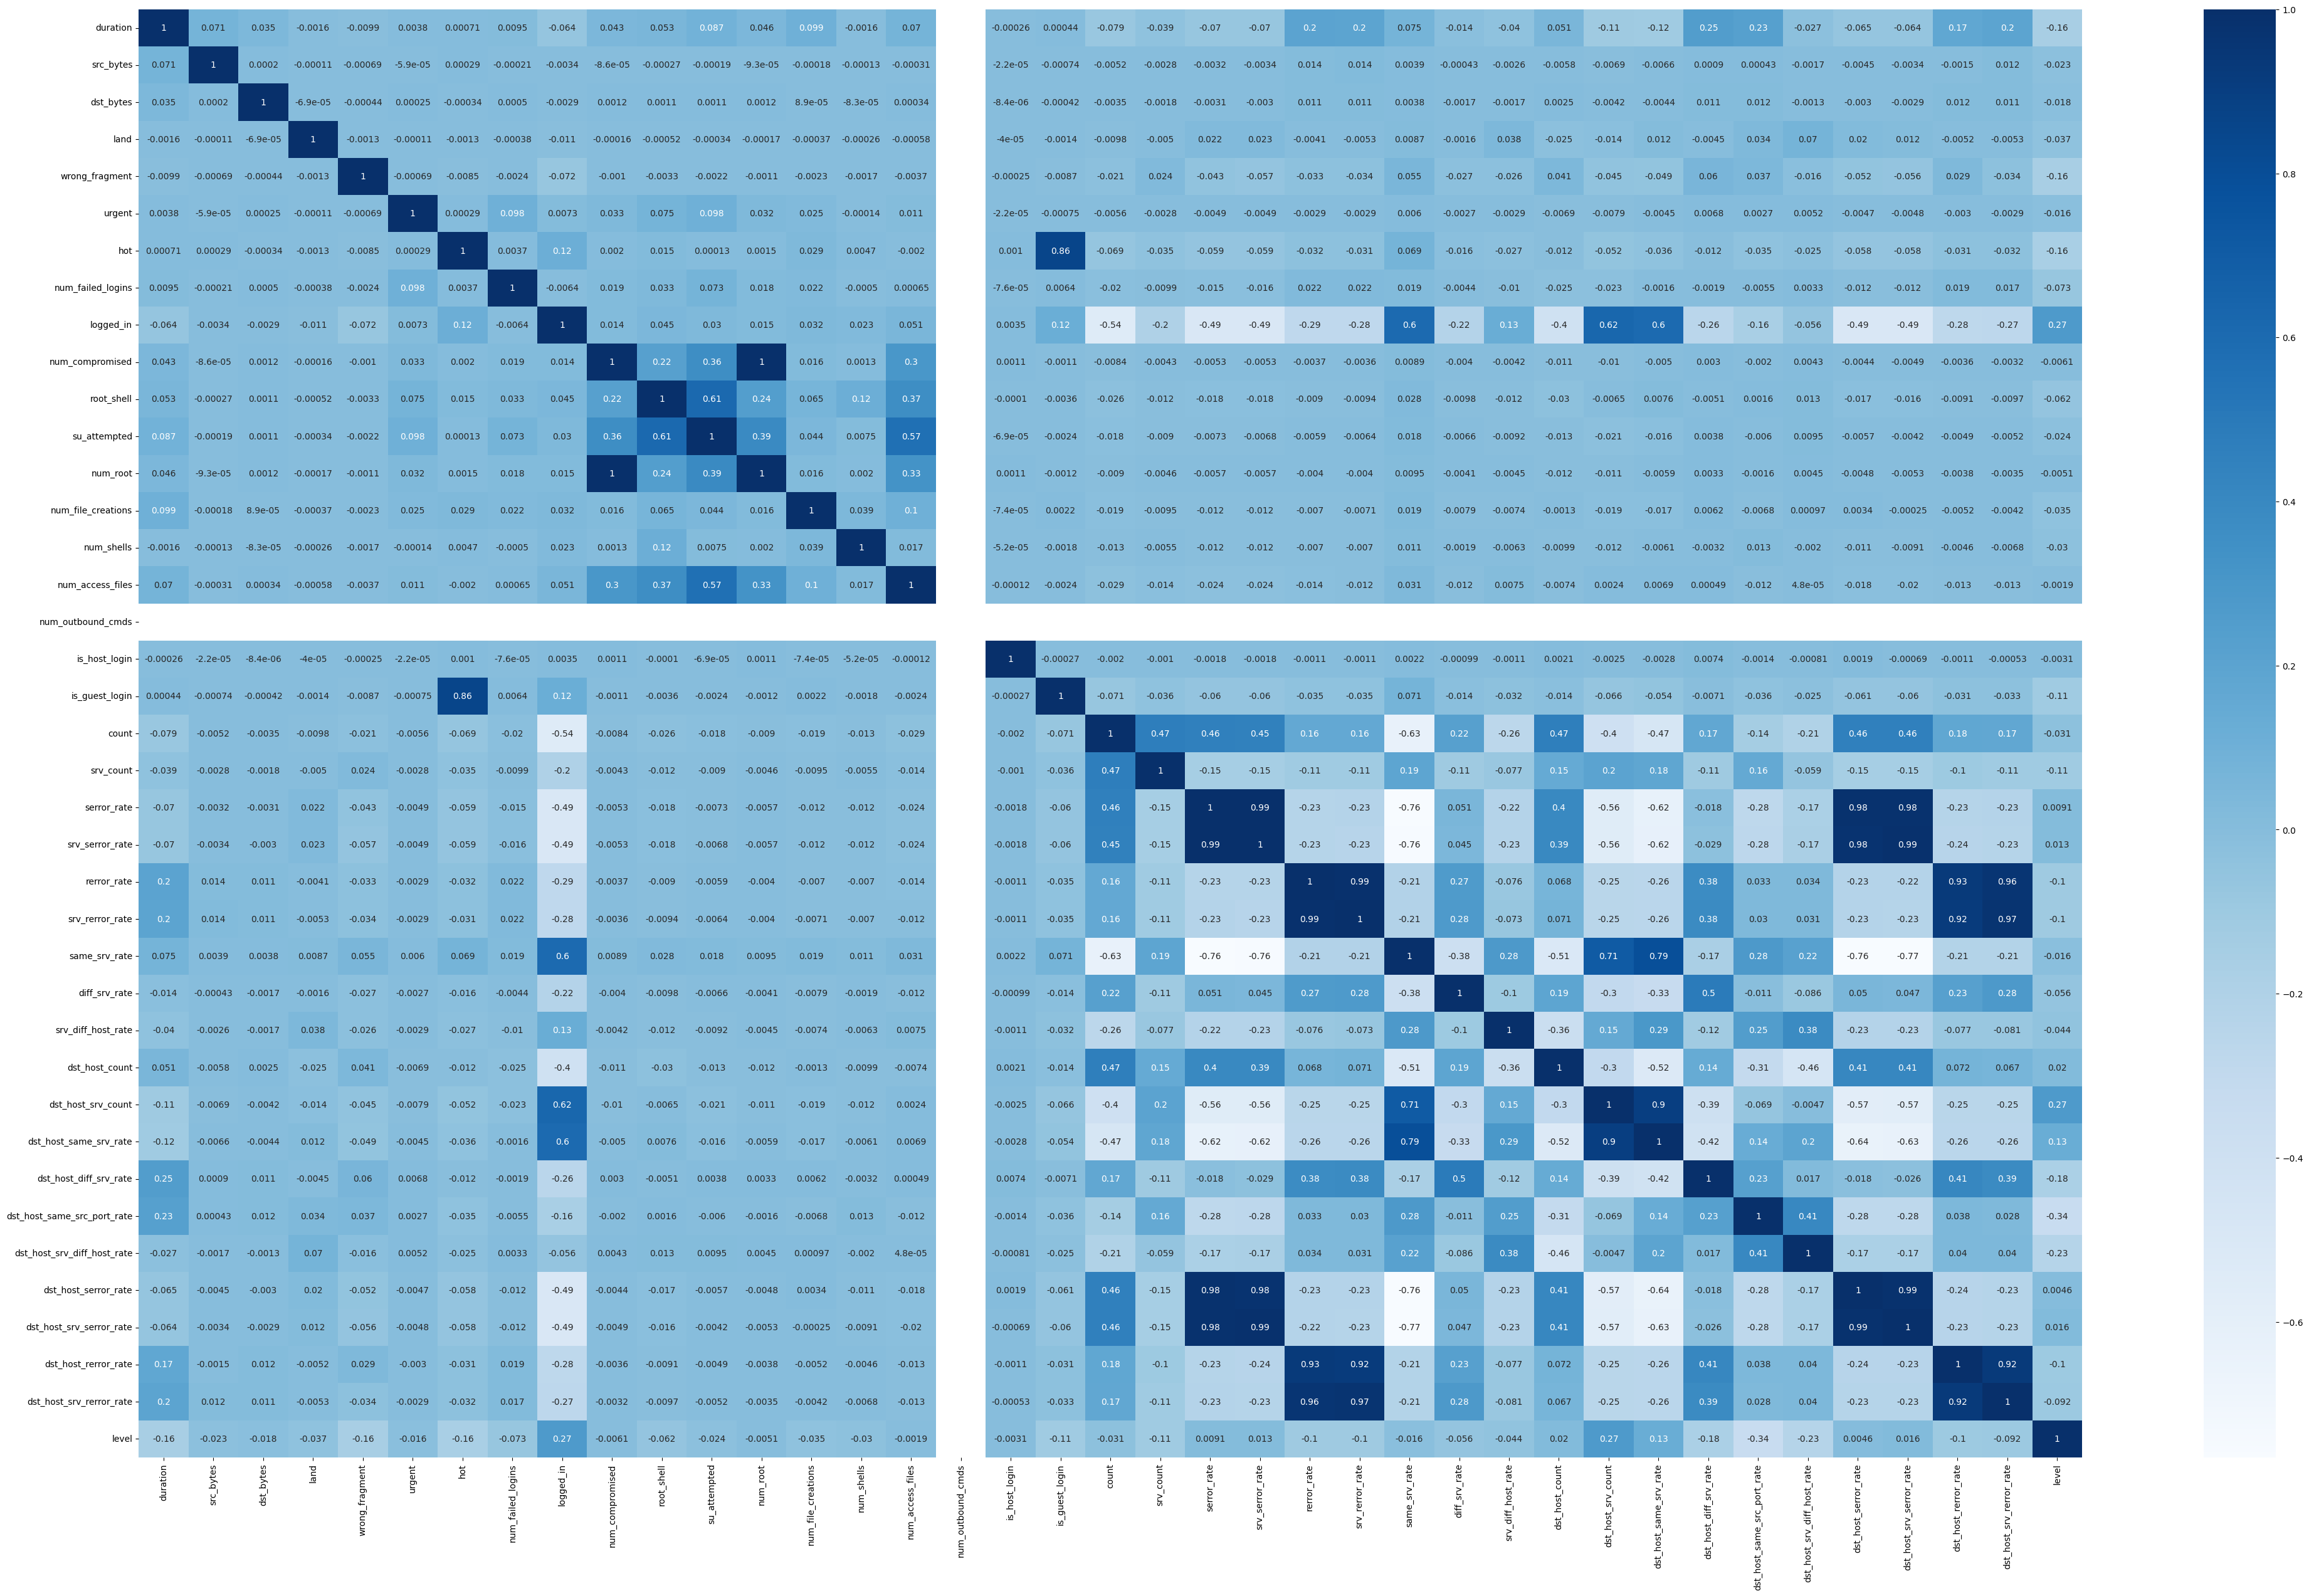

In [ ]:
#matrice de correlation
num_features = train.select_dtypes(include=np.number).columns.tolist()
corr = train[num_features].corr()
plt.figure(figsize=(50, 30))
sns.heatmap(data=corr, annot=True, cmap='Blues')
plt.show()

In [ ]:
#we dropped this feature because it has no correlation with the other features
train=train.drop(['num_outbound_cmds'],axis=1)
test=test.drop(['num_outbound_cmds'],axis=1)

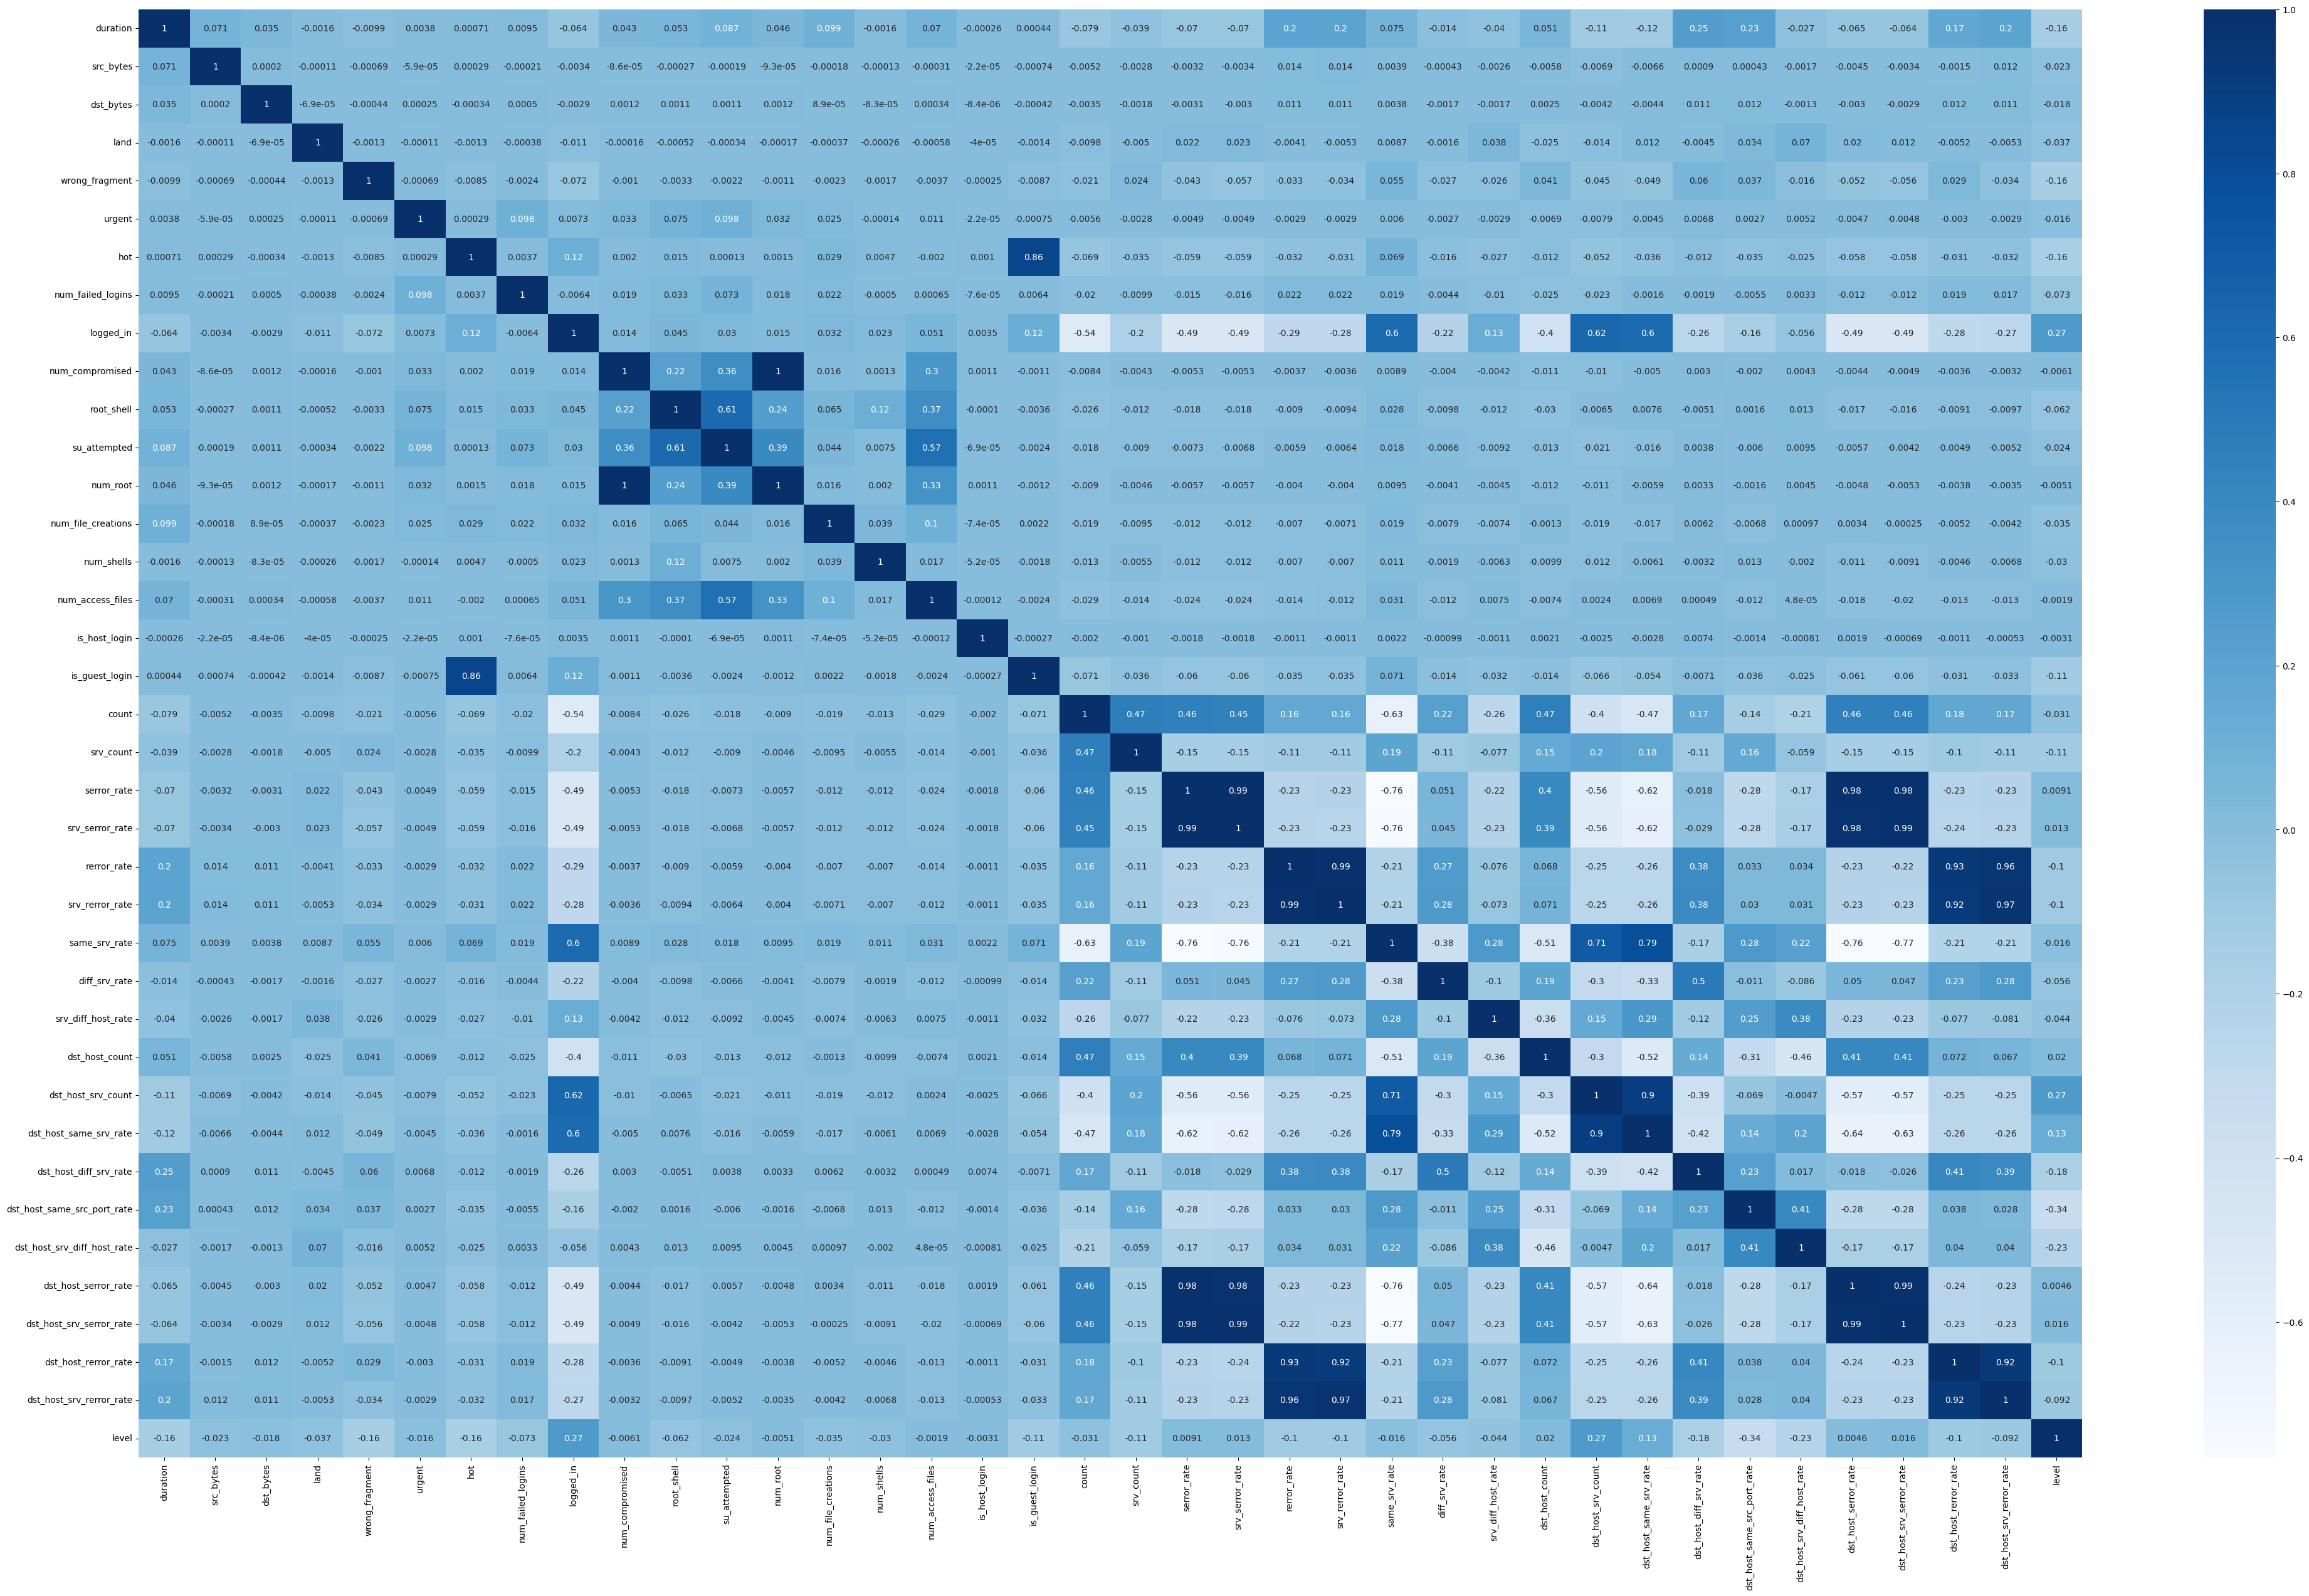

In [ ]:
#correlation matrix
num_features = train.select_dtypes(include=np.number).columns.tolist()
corr = train[num_features].corr()
plt.figure(figsize=(50, 30))
sns.heatmap(data=corr, annot=True, cmap='Blues')
plt.show()

In [ ]:

#train with numeric features
num_features = train.select_dtypes(include=np.number).columns.tolist()
corr = train[num_features].corr()

#extraction of row and column names for labels
row_names = corr.index
col_names = corr.columns

#creation of 3D surface plot
trace = go.Surface(
    x=col_names,
    y=row_names,
    z=corr.values,
    colorscale='Viridis',
)

layout = go.Layout(
    scene=dict(
        aspectmode="cube",
        zaxis=dict(title='Correlation'),
    ),
    annotations=[
        dict(
            showarrow=False,
            x=0.5,
            y=1.15,
            xref='paper',
            yref='paper',
            text='Correlation Heatmap',
            font=dict(size=16),
        ),
    ]
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
#Description of train
train.describe().T

count          mean           std  min    25%  \
duration                     125972.0    287.146929  2.604526e+03  0.0   0.00   
src_bytes                    125972.0  45567.100824  5.870354e+06  0.0   0.00   
dst_bytes                    125972.0  19779.271433  4.021285e+06  0.0   0.00   
land                         125972.0      0.000198  1.408613e-02  0.0   0.00   
wrong_fragment               125972.0      0.022688  2.535310e-01  0.0   0.00   
urgent                       125972.0      0.000111  1.436608e-02  0.0   0.00   
hot                          125972.0      0.204411  2.149977e+00  0.0   0.00   
num_failed_logins            125972.0      0.001222  4.523932e-02  0.0   0.00   
logged_in                    125972.0      0.395739  4.890107e-01  0.0   0.00   
num_compromised              125972.0      0.279253  2.394214e+01  0.0   0.00   
root_shell                   125972.0      0.001342  3.660299e-02  0.0   0.00   
su_attempted                 125972.0      0.001103  4.515456e-02  0.0   0.00   
num_root                     125972.0      0.302194  2.439971e+01  0.0   0.00   
num_file_creations           125972.0      0.012669  4.839370e-01  0.0   0.00   
num_shells                   125972.0      0.000413  2.218122e-02  0.0   0.00   
num_access_files             125972.0      0.004096  9.936995e-02  0.0   0.00   
is_host_login                125972.0      0.000008  2.817494e-03  0.0   0.00   
is_guest_login               125972.0      0.009423  9.661271e-02  0.0   0.00   
count                        125972.0     84.108207  1.145088e+02  0.0   2.00   
srv_count                    125972.0     27.738093  7.263609e+01  0.0   2.00   
serror_rate                  125972.0      0.284487  4.464567e-01  0.0   0.00   
srv_serror_rate              125972.0      0.282488  4.470236e-01  0.0   0.00   
rerror_rate                  125972.0      0.119959  3.204366e-01  0.0   0.00   
srv_rerror_rate              125972.0      0.121184  3.236483e-01  0.0   0.00   
same_srv_rate                125972.0      0.660925  4.396236e-01  0.0   0.09   
diff_srv_rate                125972.0      0.063053  1.803150e-01  0.0   0.00   
srv_diff_host_rate           125972.0      0.097322  2.598314e-01  0.0   0.00   
dst_host_count               125972.0    182.149200  9.920657e+01  0.0  82.00   
dst_host_srv_count           125972.0    115.653725  1.107029e+02  0.0  10.00   
dst_host_same_srv_rate       125972.0      0.521244  4.489501e-01  0.0   0.05   
dst_host_diff_srv_rate       125972.0      0.082952  1.889225e-01  0.0   0.00   
dst_host_same_src_port_rate  125972.0      0.148379  3.089984e-01  0.0   0.00   
dst_host_srv_diff_host_rate  125972.0      0.032543  1.125642e-01  0.0   0.00   
dst_host_serror_rate         125972.0      0.284455  4.447851e-01  0.0   0.00   
dst_host_srv_serror_rate     125972.0      0.278487  4.456702e-01  0.0   0.00   
dst_host_rerror_rate         125972.0      0.118832  3.065586e-01  0.0   0.00   
dst_host_srv_rerror_rate     125972.0      0.120241  3.194605e-01  0.0   0.00   
level                        125972.0     19.504056  2.291512e+00  0.0  18.00   

                                50%     75%           max  
duration                       0.00    0.00  4.290800e+04  
src_bytes                     44.00  276.00  1.379964e+09  
dst_bytes                      0.00  516.00  1.309937e+09  
land                           0.00    0.00  1.000000e+00  
wrong_fragment                 0.00    0.00  3.000000e+00  
urgent                         0.00    0.00  3.000000e+00  
hot                            0.00    0.00  7.700000e+01  
num_failed_logins              0.00    0.00  5.000000e+00  
logged_in                      0.00    1.00  1.000000e+00  
num_compromised                0.00    0.00  7.479000e+03  
root_shell                     0.00    0.00  1.000000e+00  
su_attempted                   0.00    0.00  2.000000e+00  
num_root                       0.00    0.00  7.468000e+03  
num_file_creations             0

In [ ]:
#description of test
test.describe().T

count          mean            std  min  \
duration                     22543.0    218.868784    1407.207069  0.0   
src_bytes                    22543.0  10395.911369  472796.912692  0.0   
dst_bytes                    22543.0   2056.110012   21219.763847  0.0   
land                         22543.0      0.000311       0.017619  0.0   
wrong_fragment               22543.0      0.008428       0.142602  0.0   
urgent                       22543.0      0.000710       0.036474  0.0   
hot                          22543.0      0.105399       0.928448  0.0   
num_failed_logins            22543.0      0.021648       0.150331  0.0   
logged_in                    22543.0      0.442222       0.496661  0.0   
num_compromised              22543.0      0.119904       7.269758  0.0   
root_shell                   22543.0      0.002440       0.049335  0.0   
su_attempted                 22543.0      0.000266       0.021061  0.0   
num_root                     22543.0      0.114670       8.041792  0.0   
num_file_creations           22543.0      0.008739       0.676857  0.0   
num_shells                   22543.0      0.001153       0.048015  0.0   
num_access_files             22543.0      0.003549       0.067831  0.0   
is_host_login                22543.0      0.000488       0.022085  0.0   
is_guest_login               22543.0      0.028435       0.166214  0.0   
count                        22543.0     79.021692     128.538218  0.0   
srv_count                    22543.0     31.125316      89.064396  0.0   
serror_rate                  22543.0      0.102928       0.295373  0.0   
srv_serror_rate              22543.0      0.103640       0.298337  0.0   
rerror_rate                  22543.0      0.238429       0.416096  0.0   
srv_rerror_rate              22543.0      0.235145       0.416193  0.0   
same_srv_rate                22543.0      0.740376       0.412479  0.0   
diff_srv_rate                22543.0      0.094075       0.259143  0.0   
srv_diff_host_rate           22543.0      0.098115       0.253550  0.0   
dst_host_count               22543.0    193.866699      94.036867  0.0   
dst_host_srv_count           22543.0    140.756332     111.783059  0.0   
dst_host_same_srv_rate       22543.0      0.608747       0.435681  0.0   
dst_host_diff_srv_rate       22543.0      0.090541       0.220722  0.0   
dst_host_same_src_port_rate  22543.0      0.132267       0.306274  0.0   
dst_host_srv_diff_host_rate  22543.0      0.019639       0.085396  0.0   
dst_host_serror_rate         22543.0      0.097818       0.273144  0.0   
dst_host_srv_serror_rate     22543.0      0.099430       0.281872  0.0   
dst_host_rerror_rate         22543.0      0.233351       0.387204  0.0   
dst_host_srv_rerror_rate     22543.0      0.226649       0.400851  0.0   
level                        22543.0     18.017833       4.270409  0.0   

                                25%     50%     75%         max  
duration                       0.00    0.00    0.00     57715.0  
src_bytes                      0.00   54.00  287.00  62825648.0  
dst_bytes                      0.00   46.00  601.00   1345927.0  
land                           0.00    0.00    0.00         1.0  
wrong_fragment                 0.00    0.00    0.00         3.0  
urgent                         0.00    0.00    0.00         3.0  
hot                            0.00    0.00    0.00       101.0  
num_failed_logins              0.00    0.00    0.00         4.0  
logged_in                      0.00    0.00    1.00         1.0  
num_compromised                0.00    0.00    0.00       796.0  
root_shell                     0.00    0.00    0.00         1.0  
su_attempted                   0.00    0.00    0.00         2.0  
num_root                       0.00    0.00    0.00       878.0  
num_file_creations             0.00    0.00    0.00       100.0  
num_shells                     0.00    0.00    0.00         5.0  
num_access_files               0.00    0.00    0.00         4.0  
is_host_login         

In [ ]:
#checking and managing outliers
#using the IQR method
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
valeurs_aberrantes = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum()
print("\nNombre de valeurs aberrantes par colonne :\n", valeurs_aberrantes)

<ipython-input-20-389282cd398d>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-20-389282cd398d>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-20-389282cd398d>:6: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`




Nombre de valeurs aberrantes par colonne :
 attack                             0
count                           3157
diff_srv_rate                   7788
dst_bytes                      23579
dst_host_count                     0
dst_host_diff_srv_rate         10550
dst_host_rerror_rate           22794
dst_host_same_src_port_rate    25051
dst_host_same_srv_rate             0
dst_host_serror_rate               0
dst_host_srv_count                 0
dst_host_srv_diff_host_rate    11682
dst_host_srv_rerror_rate       19357
dst_host_srv_serror_rate           0
duration                       10018
flag                               0
hot                             2671
is_guest_login                  1187
is_host_login                      1
land                              25
level                           2995
logged_in                          0
num_access_files                 371
num_compromised                 1286
num_failed_logins                122
num_file_creations            

<Figure size 2000x1200 with 0 Axes>

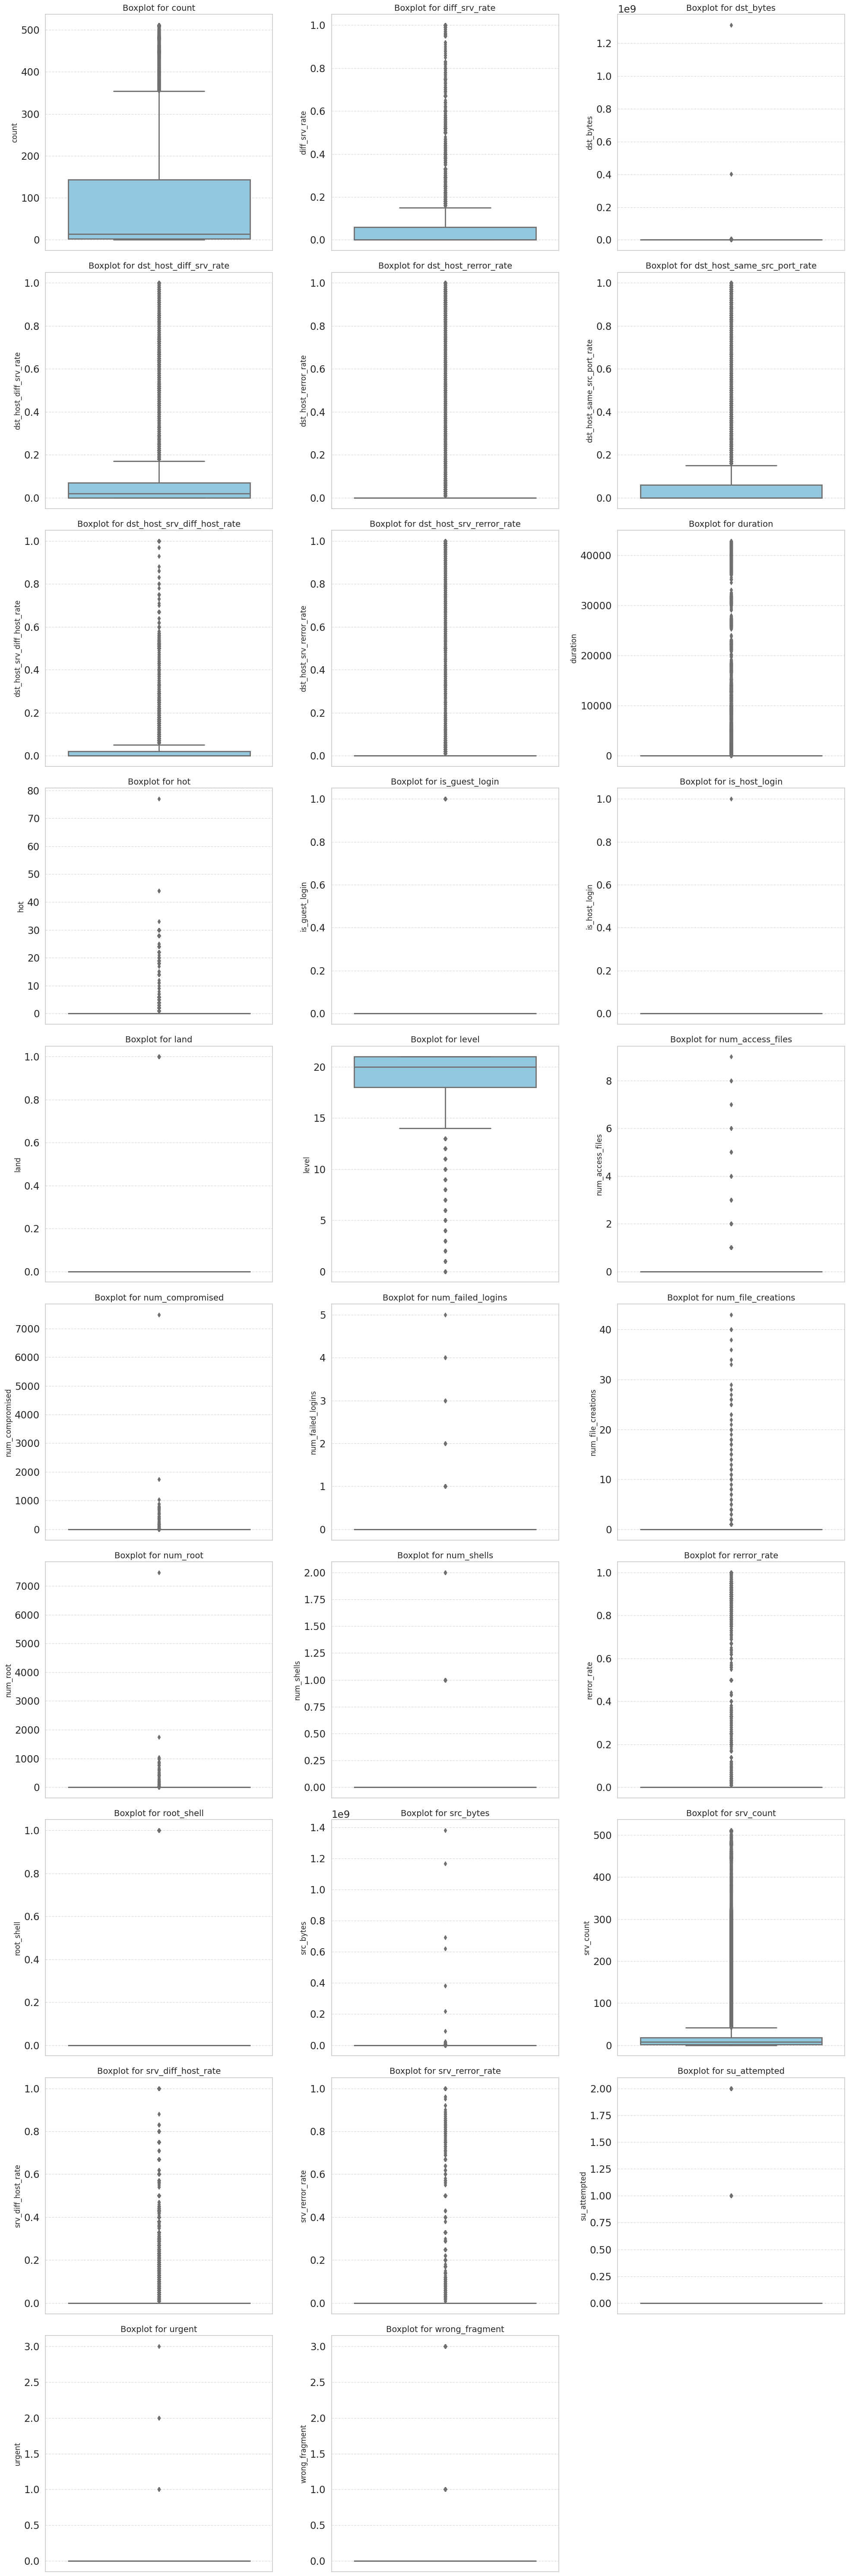

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(style="whitegrid", font_scale=1.5, palette="pastel")

#iteration over columns with outliers
outlier_columns = valeurs_aberrantes[valeurs_aberrantes > 0].index
columns_per_row = 3
num_rows = (len(outlier_columns) + columns_per_row - 1) // columns_per_row
#creation of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=columns_per_row, figsize=(20, 6 * num_rows))
axes = axes.flatten()

#iterate over columns with outliers
for i, col in enumerate(outlier_columns):
    sns.boxplot(y=train[col], ax=axes[i], color='skyblue', linewidth=2)
    axes[i].set_title(f'Boxplot for {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(len(outlier_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

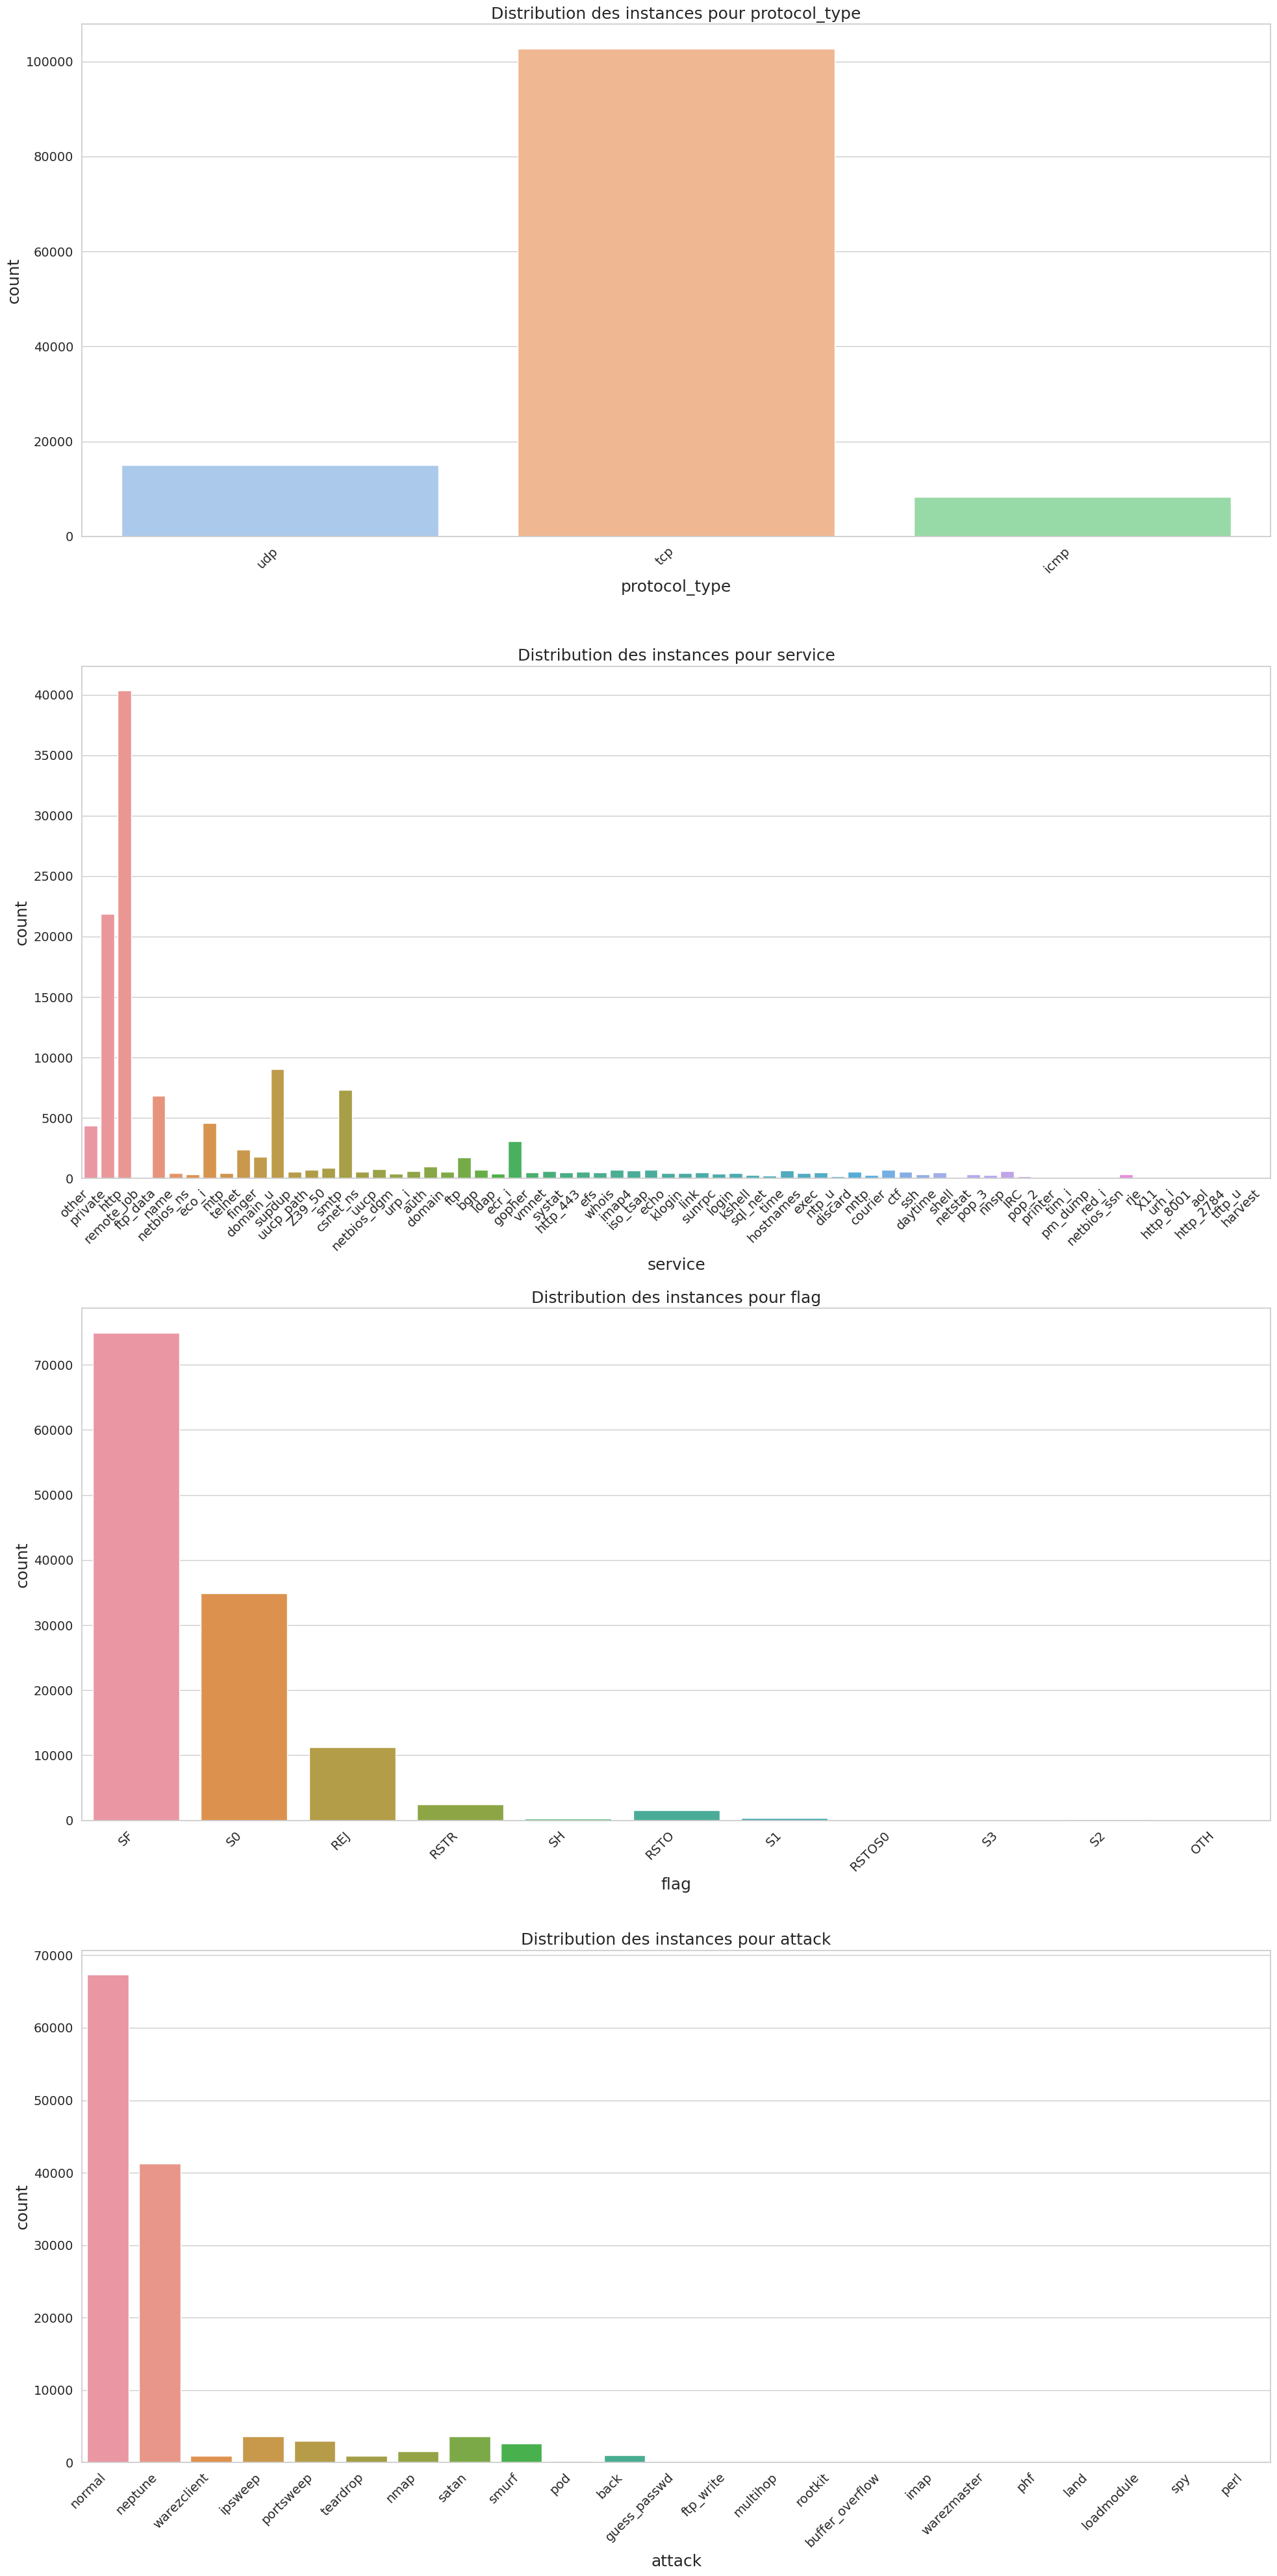

In [ ]:
qual = train.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 10 * len(qual)))

#iterate over object columns
for i, colonne in enumerate(qual, 1):
    plt.subplot(len(qual), 1, i)
    sns.countplot(data=train, x=colonne)
    plt.title(f'Distribution des instances pour {colonne}', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']
#convert identified columns to category
train[categorical_columns] = train[categorical_columns].astype('category')
label_encoder = LabelEncoder()
#create a dictionary to store the mapping
encoding_mapping = {}

for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])
#store the mapping in the dictionary
    encoding_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

#display the encoding mapping
print("\nEncoding Mapping:")
for col, mapping in encoding_mapping.items():
    print(f"{col}: {mapping}")


Encoding Mapping:
protocol_type: {'icmp': 0, 'tcp': 1, 'udp': 2}
service: {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']
#convert identified columns to category
test[categorical_columns] = test[categorical_columns].astype('category')
label_encoder = LabelEncoder()

#create a dictionary to store the mapping
encoding_mapping = {}

for col in categorical_columns:
    test[col] = label_encoder.fit_transform(test[col])
    encoding_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the encoding mapping
print("\nEncoding Mapping:")
for col, mapping in encoding_mapping.items():
    print(f"{col}: {mapping}")


Encoding Mapping:
protocol_type: {'icmp': 0, 'tcp': 1, 'udp': 2}
service: {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'auth': 3, 'bgp': 4, 'courier': 5, 'csnet_ns': 6, 'ctf': 7, 'daytime': 8, 'discard': 9, 'domain': 10, 'domain_u': 11, 'echo': 12, 'eco_i': 13, 'ecr_i': 14, 'efs': 15, 'exec': 16, 'finger': 17, 'ftp': 18, 'ftp_data': 19, 'gopher': 20, 'hostnames': 21, 'http': 22, 'http_443': 23, 'imap4': 24, 'iso_tsap': 25, 'klogin': 26, 'kshell': 27, 'ldap': 28, 'link': 29, 'login': 30, 'mtp': 31, 'name': 32, 'netbios_dgm': 33, 'netbios_ns': 34, 'netbios_ssn': 35, 'netstat': 36, 'nnsp': 37, 'nntp': 38, 'ntp_u': 39, 'other': 40, 'pm_dump': 41, 'pop_2': 42, 'pop_3': 43, 'printer': 44, 'private': 45, 'remote_job': 46, 'rje': 47, 'shell': 48, 'smtp': 49, 'sql_net': 50, 'ssh': 51, 'sunrpc': 52, 'supdup': 53, 'systat': 54, 'telnet': 55, 'tftp_u': 56, 'tim_i': 57, 'time': 58, 'urp_i': 59, 'uucp': 60, 'uucp_path': 61, 'vmnet': 62, 'whois': 63}
flag: {'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']
#apply one hot encoding to the labeled categorical columns
train = pd.get_dummies(train, columns=categorical_columns)
train.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        146          0     0               0       0    0   
1         0          0          0     0               0       0    0   
2         0        232       8153     0               0       0    0   
3         0        199        420     0               0       0    0   
4         0          0          0     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_1  flag_2  flag_3  \
0                  0          0                0  ...       0       0       0   
1                  0          0                0  ...       0       0       0   
2                  0          1                0  ...       0       0       0   
3                  0          1                0  ...       0       0       0   
4                  0          0                0  ...       1       0       0   

   flag_4  flag_5  flag_6  flag_7  flag_8  flag_9  flag_10  
0       0       0       0       0       0       1        0  
1       0       1       0       0       0       0        0  
2       0       0       0       0       0       1        0  
3       0       0       0       0       0       1        0  
4       0       0       0       0       0       0        0  

[5 rows x 123 columns]

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']
#apply one hot encoding to the labeled categorical columns
test = pd.get_dummies(test, columns=categorical_columns)
test.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0          0          0     0               0       0    0   
1         2      12983          0     0               0       0    0   
2         0         20          0     0               0       0    0   
3         1          0         15     0               0       0    0   
4         0        267      14515     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_1  flag_2  flag_3  \
0                  0          0                0  ...       1       0       0   
1                  0          0                0  ...       0       0       0   
2                  0          0                0  ...       0       0       0   
3                  0          0                0  ...       0       1       0   
4                  0          1                0  ...       0       0       0   

   flag_4  flag_5  flag_6  flag_7  flag_8  flag_9  flag_10  
0       0       0       0       0       0       0        0  
1       0       0       0       0       0       1        0  
2       0       0       0       0       0       1        0  
3       0       0       0       0       0       0        0  
4       0       0       0       0       0       1        0  

[5 rows x 117 columns]

In [ ]:
print('train', train.shape)
print('test', test.shape)
#there is features that exist in train and does not exist in test so we need to add them but their values will be 0

train (125972, 123)
test (22543, 117)


In [ ]:
#checking which features are mssing
missing_columns = set(train.columns) - set(test.columns)
print(missing_columns)

{'service_69', 'service_66', 'service_65', 'service_68', 'service_64', 'service_67'}


In [ ]:
#add missing features to the test set and set their values to zero
for column in missing_columns:
    test[column] = 0

In [ ]:
train.shape

(125972, 123)

In [ ]:
test.shape


(22543, 123)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Columns: 123 entries, duration to service_67
dtypes: float64(15), int64(29), object(1), uint8(78)
memory usage: 9.4+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 123 entries, duration to flag_10
dtypes: float64(15), int64(23), object(1), uint8(84)
memory usage: 47.6+ MB


In [ ]:
#mapping the attack values to 4 attack types
def change_label(data):
    data.attack.replace(['neptune', 'back', 'land', 'pod', 'smurf', 'teardrop', 'mailbomb', 'apache2',
                         'processtable', 'udpstorm', 'worm'], 'DoS', inplace=True)
    data.attack.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient',
                         'warezmaster', 'sendmail', 'named', 'snmpgetattack', 'snmpguess', 'xlock', 'xsnoop', 'httptunnel'], 'R2L', inplace=True)
    data.attack.replace(['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'], 'Probe', inplace=True)
    data.attack.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 'U2R', inplace=True)
    return data

In [ ]:
change_label(test)
change_label(train)

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        146          0     0               0       0    0   
1              0          0          0     0               0       0    0   
2              0        232       8153     0               0       0    0   
3              0        199        420     0               0       0    0   
4              0          0          0     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
125967         0          0          0     0               0       0    0   
125968         8        105        145     0               0       0    0   
125969         0       2231        384     0               0       0    0   
125970         0          0          0     0               0       0    0   
125971         0        151          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_1  flag_2  \
0                       0          0                0  ...       0       0   
1                       0          0                0  ...       0       0   
2                       0          1                0  ...       0       0   
3                       0          1                0  ...       0       0   
4                       0          0                0  ...       1       0   
...                   ...        ...              ...  ...     ...     ...   
125967                  0          0                0  ...       0       0   
125968                  0          0                0  ...       0       0   
125969                  0          1                0  ...       0       0   
125970                  0          0                0  ...       0       0   
125971                  0          1                0  ...       0       0   

        flag_3  flag_4  flag_5  flag_6  flag_7  flag_8  flag_9  flag_10  
0            0       0       0       0       0       0       1        0  
1            0       0       1       0       0       0       0        0  
2            0       0       0       0       0       0       1        0  
3            0       0       0       0       0       0       1        0  
4            0       0       0       0       0       0       0        0  
...        ...     ...     ...     ...     ...     ...     ...      ...  
125967       0       0       1       0       0       0       0        0  
125968       0       0       0       0       0       0       1        0  
125969       0       0       0       0       0       0       1        0  
125970       0       0       1       0       0       0       0        0  
125971       0       0       0       0       0       0       1        0  

[125972 rows x 123 columns]

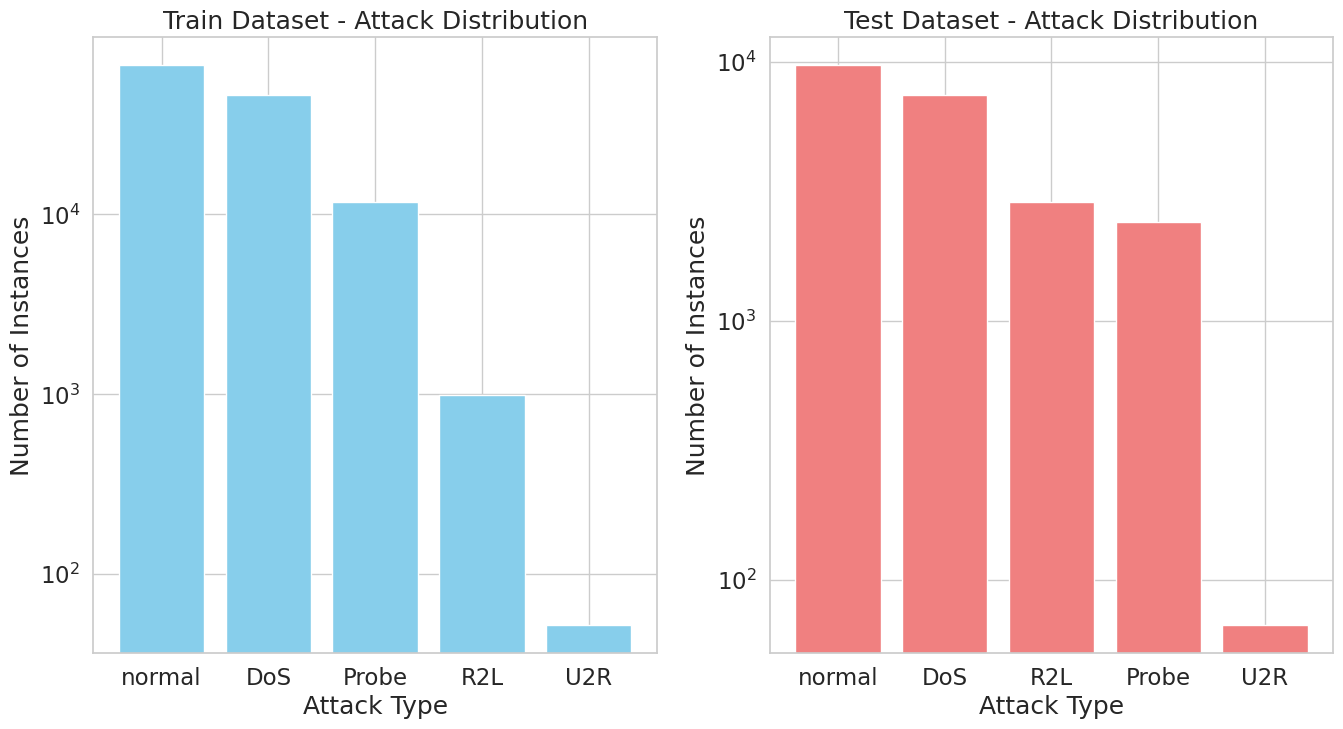

In [ ]:
#visualisation des distributions des attacks dans train et test
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

train_attack_distribution = train['attack'].value_counts()
axes[0].bar(train_attack_distribution.index, train_attack_distribution, color='skyblue')
axes[0].set_title('Train Dataset - Attack Distribution')
axes[0].set_xlabel('Attack Type')
axes[0].set_ylabel('Number of Instances')
axes[0].set_yscale('log')

test_attack_distribution = test['attack'].value_counts()
axes[1].bar(test_attack_distribution.index, test_attack_distribution, color='lightcoral')
axes[1].set_title('Test Dataset - Attack Distribution')
axes[1].set_xlabel('Attack Type')
axes[1].set_ylabel('Number of Instances')
axes[1].set_yscale('log')

plt.show()

In [ ]:
print('Training set:')
for col_name in train.columns:
  if train[col_name].dtypes == 'object' :
    unique_cat = len(train[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Training set:
Feature 'attack' has 5 categories


In [ ]:
print('Testing set:')
for col_name in test.columns:
  if test[col_name].dtypes == 'object' :
    unique_cat = len(test[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


Testing set:
Feature 'attack' has 5 categories


In [ ]:
test.attack.unique()

array(['DoS', 'normal', 'Probe', 'R2L', 'U2R'], dtype=object)

In [ ]:
train['attack'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [ ]:
train.attack.value_counts()

normal    67342
DoS       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

In [ ]:
test.attack.value_counts()

normal    9711
DoS       7459
R2L       2885
Probe     2421
U2R         67
Name: attack, dtype: int64

In [ ]:
attack_mapping = {'normal': 0, 'DoS': 1, 'R2L': 2, 'Probe': 3, 'U2R': 4}

#create a new column 'xAttack' based on the mapping
train['xAttack'] = train['attack'].map(attack_mapping)
# Display the original 'attack' and the corresponding 'xAttack'
print(train[['attack', 'xAttack']])

test['xAttack'] = test['attack'].map(attack_mapping)
print(test[['attack', 'xAttack']])

        attack  xAttack
0       normal        0
1          DoS        1
2       normal        0
3       normal        0
4          DoS        1
...        ...      ...
125967     DoS        1
125968  normal        0
125969  normal        0
125970     DoS        1
125971  normal        0

[125972 rows x 2 columns]
       attack  xAttack
0         DoS        1
1      normal        0
2       Probe        3
3       Probe        3
4      normal        0
...       ...      ...
22538  normal        0
22539  normal        0
22540     DoS        1
22541  normal        0
22542   Probe        3

[22543 rows x 2 columns]


In [ ]:
train = train.drop('attack', axis=1)
test = test.drop('attack', axis=1)

In [ ]:
train.shape

(125972, 123)

In [ ]:
test.shape

(22543, 123)

In [ ]:
#creating subsets
train_dos_df = train[train['xAttack'].isin([1,0])]
train_u2r_df = train[train['xAttack'].isin([4, 0])]
train_r2l_df = train[train['xAttack'].isin([2, 0])]
train_probe_df = train[train['xAttack'].isin([3, 0])]

test_dos_df = test[test['xAttack'].isin([1, 0])]
test_u2r_df = test[test['xAttack'].isin([4, 0])]
test_r2l_df = test[test['xAttack'].isin([2, 0])]
test_probe_df = test[test['xAttack'].isin([3, 0])]

print('Train:')
print('Dimensions of DoS:' ,train_dos_df.shape)
print('Dimensions of Probe:' ,train_probe_df.shape)
print('Dimensions of R2L:' ,train_r2l_df.shape)
print('Dimensions of U2R:' ,train_u2r_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,test_dos_df.shape)
print('Dimensions of Probe:' ,test_probe_df.shape)
print('Dimensions of R2L:' ,test_r2l_df.shape)
print('Dimensions of U2R:' ,test_u2r_df.shape)

Train:
Dimensions of DoS: (113269, 123)
Dimensions of Probe: (78998, 123)
Dimensions of R2L: (68337, 123)
Dimensions of U2R: (67394, 123)

Test:
Dimensions of DoS: (17170, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


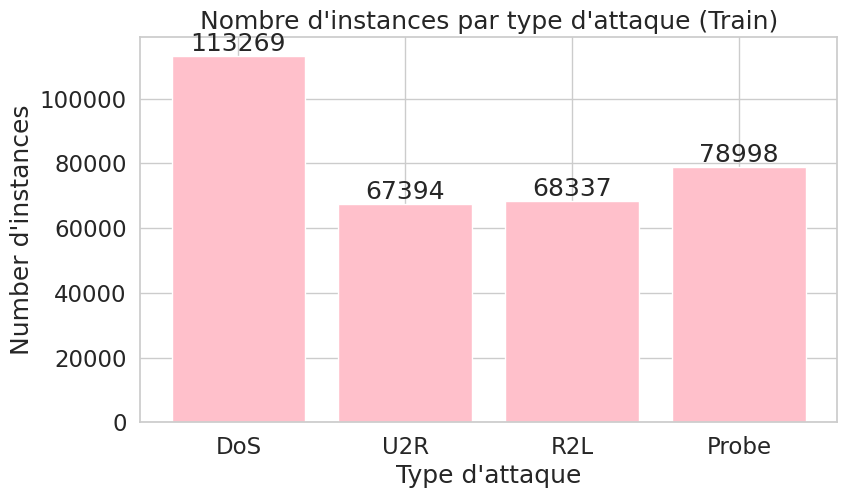

In [ ]:
attack_types = ['DoS', 'U2R','R2L','Probe']
data_lengths = [len(train_dos_df), len(train_u2r_df), len(train_r2l_df),len(train_probe_df)]

# Create bar plot
plt.figure(figsize=(9, 5))
plt.bar(attack_types, data_lengths,color='pink')
for i, length in enumerate(data_lengths):
    plt.text(i, length + 0.1, str(length), ha='center', va='bottom')
plt.title('Nombre d\'instances par type d\'attaque (Train)')
plt.xlabel('Type d\'attaque')
plt.ylabel('Number d\'instances')

plt.show()

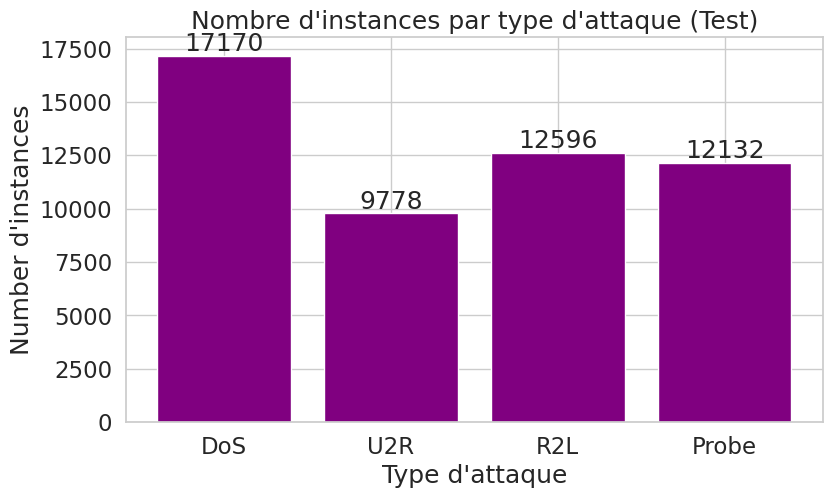

In [ ]:
data_lengths = [len(test_dos_df), len(test_u2r_df), len(test_r2l_df),len(test_probe_df)]

# Create bar plot
plt.figure(figsize=(9, 5))
plt.bar(attack_types, data_lengths,color='Purple')
for i, length in enumerate(data_lengths):
    plt.text(i, length + 0.1, str(length), ha='center', va='bottom')
plt.title('Nombre d\'instances par type d\'attaque (Test)')
plt.xlabel('Type d\'attaque')
plt.ylabel('Number d\'instances')

plt.show()

In [ ]:
def split_data(df):
    X = df.drop('xAttack', 1)
    Y = df['xAttack']
    return X, Y

#splitting training subsets
X_train_DoS, Y_train_DoS = split_data(train_dos_df)
X_train_U2R, Y_train_U2R = split_data(train_u2r_df)
X_train_R2L, Y_train_R2L = split_data(train_r2l_df)
X_train_Probe, Y_train_Probe = split_data(train_probe_df)

#splitting testing subsets
X_test_DoS, Y_test_DoS = split_data(test_dos_df)
X_test_U2R, Y_test_U2R = split_data(test_u2r_df)
X_test_R2L, Y_test_R2L = split_data(test_r2l_df)
X_test_Probe, Y_test_Probe = split_data(test_probe_df)


<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

<ipython-input-50-0f82125f175c>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

In [ ]:
colNames=list(X_train_DoS)
colNames_test=list(X_test_DoS)

In [ ]:
#check if feature names are the same for each subset
def check_feature_names(train_df, test_df):
    train_features = set(train_df.columns)
    test_features = set(test_df.columns)

    if train_features == test_features:
        print("Feature names match between training and testing sets.")
    else:
        print("Feature names do not match between training and testing sets.")
        print("Features in training set but not in testing set:", train_features - test_features)
        print("Features in testing set but not in training set:", test_features - train_features)

check_feature_names(X_train_DoS, X_test_DoS)
check_feature_names(X_train_U2R, X_test_U2R)
check_feature_names(X_train_R2L, X_test_R2L)
check_feature_names(X_train_Probe, X_test_Probe)

Feature names match between training and testing sets.
Feature names match between training and testing sets.
Feature names match between training and testing sets.
Feature names match between training and testing sets.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#create MinMaxScaler with a specified feature range
scaler = MinMaxScaler(feature_range=(0, 1))

#list of subsets
X_sets = [X_train_DoS, X_train_Probe, X_train_R2L, X_train_U2R,
          X_test_DoS, X_test_Probe, X_test_R2L, X_test_U2R]

#apply normalization to each subset
X_train_DoS, X_train_Probe, X_train_R2L, X_train_U2R, \
X_test_DoS, X_test_Probe, X_test_R2L, X_test_U2R = \
    [scaler.fit_transform(X) for X in X_sets]


In [ ]:
#concatenate normalized features into a single DataFrame for each train and test set
normalized_train_sets = [X_train_DoS, X_train_Probe, X_train_R2L, X_train_U2R]
normalized_test_sets = [X_test_DoS, X_test_Probe, X_test_R2L, X_test_U2R]

df_train_normalized = pd.concat([pd.DataFrame(X) for X in normalized_train_sets], axis=0, ignore_index=True)
df_test_normalized = pd.concat([pd.DataFrame(X) for X in normalized_test_sets], axis=0, ignore_index=True)


print("Summary Statistics for Normalized Training Data:")
df_train_normalized.describe()


Summary Statistics for Normalized Training Data:


0             1              2              3    \
count  327998.000000  3.279980e+05  327998.000000  327998.000000   
mean        0.005137  1.144490e-04       0.000424       0.000140   
std         0.045349  4.578266e-03       0.009047       0.011842   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  1.057999e-07       0.000000       0.000000   
50%         0.000000  1.172117e-06       0.000010       0.000000   
75%         0.000000  3.203786e-06       0.000111       0.000000   
max         1.000000  1.000000e+00       1.000000       1.000000   

                 4              5              6              7    \
count  327998.000000  327998.000000  327998.000000  327998.000000   
mean        0.002904       0.000045       0.002865       0.000307   
std         0.052502       0.005397       0.029206       0.011263   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 8              9    ...            112            113  \
count  327998.000000  327998.000000  ...  327998.000000  327998.000000   
mean        0.589708       0.000056  ...       0.058878       0.006765   
std         0.491887       0.003968  ...       0.235397       0.081973   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         1.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

                 114            115            116            117  \
count  327998.000000  327998.000000  327998.000000  327998.000000   
mean        0.000314       0.008717       0.109492       0.004415   
std         0.017718       0.092955       0.312255       0.066296   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 118            119            120            121  
count  327998.000000  327998.000000  327998.000000  327998.000000  
mean        0.001476       0.000561       0.808298       0.000845  
std         0.038385       0.023678       0.393641       0.029048  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       1.000000       0.000000  
50%         0.000000       0.000000       1.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 122 columns]

In [ ]:
print("\nSummary Statistics for Normalized Testing Data:")
df_test_normalized.describe()


Summary Statistics for Normalized Testing Data:


0             1             2             3             4    \
count  51676.000000  51676.000000  51676.000000  51676.000000  51676.000000   
mean       0.002226      0.000438      0.002411      0.000135      0.003664   
std        0.023491      0.011366      0.020383      0.011638      0.056749   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000002      0.000031      0.000000      0.000000   
50%        0.000000      0.000017      0.000247      0.000000      0.000000   
75%        0.000000      0.000045      0.001396      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  51676.000000  51676.000000  51676.000000  51676.000000  51676.000000   
mean       0.000116      0.000742      0.002579      0.619611      0.000200   
std        0.009038      0.011156      0.028499      0.485487      0.011914   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...           112           113           114           115      116  \
count  ...  51676.000000  51676.000000  51676.000000  51676.000000  51676.0   
mean   ...      0.000755      0.005051      0.845576      0.001413      0.0   
std    ...      0.027462      0.070889      0.361358      0.037559      0.0   
min    ...      0.000000      0.000000      0.000000      0.000000      0.0   
25%    ...      0.000000      0.000000      1.000000      0.000000      0.0   
50%    ...      0.000000      0.000000      1.000000      0.000000      0.0   
75%    ...      0.000000      0.000000      1.000000      0.000000      0.0   
max    ...      1.000000      1.000000      1.000000      1.000000      0.0   

           117      118      119      120      121  
count  51676.0  51676.0  51676.0  51676.0  51676.0  
mean       0.0      0.0      0.0      0.0      0.0  
std        0.0      0.0      0.0      0.0      0.0  
min        0.0      0.0      0.0      0.0      0.0  
25%        0.0      0.0      0.0      0.0      0.0  
50%        0.0      0.0      0.0      0.0      0.0  
75%        0.0      0.0      0.0      0.0      0.0  
max        0.0      0.0      0.0      0.0      0.0  

[8 rows x 122 columns]

##FEATURE SELECTION WITH ANOVA

###DOS

In [ ]:
#application ANOVA on the subset DoS
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_train_DoS,Y_train_DoS)
X_newDoS.shape


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 44  63  66  68  86 114] are constant.



(113269, 13)

In [ ]:
true=selector.get_support()
newcolindex_DoS=[i for i, x in enumerate(true) if x]
newcolname_DoS=list( colNames[i] for i in newcolindex_DoS )
newcolname_DoS

['logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_24',
 'flag_5',
 'flag_9']

###PROBE

In [ ]:
#probe
X_newProbe = selector.fit_transform(X_train_Probe,Y_train_Probe)
X_newProbe.shape


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [4] are constant.



(78998, 13)

In [ ]:
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
newcolname_Probe

['logged_in',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level',
 'protocol_type_0',
 'service_14',
 'service_49',
 'flag_9']

###R2L vs RF



```
#
```



In [ ]:
#R2L
X_newR2L = selector.fit_transform(X_train_R2L,Y_train_R2L)
X_newR2L.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [  4  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67  68
  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92  93
  96  98  99 100 107 108 109 110 114] are constant.



(68337, 13)

In [ ]:
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
newcolname_R2L

['dst_bytes',
 'hot',
 'num_failed_logins',
 'is_guest_login',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_19',
 'service_20',
 'service_24',
 'service_28',
 'flag_2']

In [ ]:
#random forest feature selection for R2L
rf_R2L = RandomForestClassifier(n_estimators=100, random_state=42)
rf_R2L.fit(X_train_R2L, Y_train_R2L)
selector_rf_R2L = SelectFromModel(rf_R2L, prefit=True)
X_newR2L_rf = selector_rf_R2L.transform(X_train_R2L)
true_rf_R2L = selector_rf_R2L.get_support()
newcolindex_rf_R2L = [i for i, x in enumerate(true_rf_R2L) if x]
newcolname_rf_R2L = list(colNames[i] for i in newcolindex_rf_R2L)

In [ ]:
#compare the features selected by ANOVA and random forest for R2L
print("Features selected by ANOVA for R2L:", newcolname_R2L)
print("Features selected by Random Forest for R2L:", newcolname_rf_R2L)

clf_anova_R2L = RandomForestClassifier(n_estimators=100, random_state=42)
scores_anova_R2L = cross_val_score(clf_anova_R2L, X_newR2L, Y_train_R2L, cv=5)
clf_rf_R2L = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf_R2L = cross_val_score(clf_rf_R2L, X_newR2L_rf, Y_train_R2L, cv=5)

print("Cross-validation scores with ANOVA-selected features for R2L:", scores_anova_R2L.mean())
print("Cross-validation scores with Random Forest-selected features for R2L:", scores_rf_R2L.mean())


Features selected by ANOVA for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_19', 'service_20', 'service_24', 'service_28', 'flag_2']
Features selected by Random Forest for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'is_guest_login', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'level', 'service_19', 'service_20']
Cross-validation scores with ANOVA-selected features for R2L: 0.9993561368200637
Cross-validation scores with Random Forest-selected features for R2L: 0.999604899462933



###U2R ANOVA VS RF

In [ ]:
#U2R
X_newU2R = selector.fit_transform(X_train_U2R,Y_train_U2R)
X_newU2R.shape


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [  4  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67  68
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.



(67394, 13)

In [ ]:
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
newcolname_U2R

['urgent',
 'hot',
 'root_shell',
 'num_file_creations',
 'num_shells',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'level',
 'service_20',
 'service_24',
 'service_60']

In [ ]:

# Random Forest feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_U2R, Y_train_U2R)
selector_rf = SelectFromModel(rf, prefit=True)
X_newU2R_rf = selector_rf.transform(X_train_U2R)
true_rf = selector_rf.get_support()
newcolindex_rf = [i for i, x in enumerate(true_rf) if x]
newcolname_rf = list(colNames[i] for i in newcolindex_rf)

In [ ]:
# Compare the features selected by ANOVA and Random Forest
print("Features selected by ANOVA:", newcolname_U2R)
print("Features selected by Random Forest:", newcolname_rf)


Features selected by ANOVA: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_20', 'service_24', 'service_60']
Features selected by Random Forest: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'num_shells', 'count', 'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'level', 'service_20', 'service_60']


In [ ]:
clf_anova = RandomForestClassifier(n_estimators=100, random_state=42)
scores_anova = cross_val_score(clf_anova, X_newU2R, Y_train_U2R, cv=5)

clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores_rf = cross_val_score(clf_rf, X_newU2R_rf, Y_train_U2R, cv=5)

print("Cross-validation scores with ANOVA-selected features:", scores_anova.mean())
print("Cross-validation scores with Random Forest-selected features:", scores_rf.mean())

Cross-validation scores with ANOVA-selected features: 0.9996290481967515
Cross-validation scores with Random Forest-selected features: 0.9997329145695533


In [ ]:
#on a trouver que l'anova et random forest sont presque égaux donc on a continuer avec anova comme prévu dans le paper 1

### Summary of features selected by Univariate Feature Selection





In [ ]:
print('Features selected for DoS:',newcolname_DoS)
print()
print('Features selected for Probe:',newcolname_Probe)
print()
print('Features selected for R2L:',newcolname_R2L)
print()
print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_24', 'flag_5', 'flag_9']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'protocol_type_0', 'service_14', 'service_49', 'flag_9']

Features selected for R2L: ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_19', 'service_20', 'service_24', 'service_28', 'flag_2']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_20', 'ser

#MODELING AND EVALUATION

##Preparing to apply models


In [ ]:
X_train_DoS.shape

(113269, 122)

In [ ]:
X_test_DoS.shape

(17170, 122)

In [ ]:
for i in range(len(X_sets)):
  X_sets[i] = pd.DataFrame(X_sets[i], columns=colNames if i < 4 else colNames_test)


In [ ]:
#train
X_train_DoS=pd.DataFrame(X_train_DoS,columns=colNames)
X_train_Probe=pd.DataFrame(X_train_Probe,columns=colNames)
X_train_R2L=pd.DataFrame(X_train_R2L,columns=colNames)
X_train_U2R=pd.DataFrame(X_train_U2R,columns=colNames)
#test
X_test_DoS=pd.DataFrame(X_test_DoS,columns=colNames_test)
X_test_Probe=pd.DataFrame(X_test_Probe,columns=colNames_test)
X_test_R2L=pd.DataFrame(X_test_R2L,columns=colNames_test)
X_test_U2R=pd.DataFrame(X_test_U2R,columns=colNames_test)



In [ ]:
print(X_train_DoS.shape)
print(X_test_DoS.shape)

(113269, 122)
(17170, 122)


In [ ]:

# Features selected for DoS
features_DoS = ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_24', 'flag_5', 'flag_9']
X_subset_DoS = X_train_DoS[features_DoS]

# Features selected for Probe
features_Probe = ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level', 'protocol_type_0', 'service_14', 'service_49', 'flag_9']
X_subset_Probe = X_train_Probe[features_Probe]

# Features selected for R2L
features_R2L = ['dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_19', 'service_20', 'service_24', 'service_28', 'flag_2']
X_subset_R2L = X_train_R2L[features_R2L]

# Features selected for U2R
features_U2R = ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'level', 'service_20', 'service_24', 'service_60']
X_subset_U2R = X_train_U2R[features_U2R]

# Print the shape of the subsets to verify
print("Shape of X_subset_DoS:", X_subset_DoS.shape)
print("Shape of X_subset_Probe:", X_subset_Probe.shape)
print("Shape of X_subset_R2L:", X_subset_R2L.shape)
print("Shape of X_subset_U2R:", X_subset_U2R.shape)


Shape of X_subset_DoS: (113269, 13)
Shape of X_subset_Probe: (78998, 13)
Shape of X_subset_R2L: (68337, 13)
Shape of X_subset_U2R: (67394, 13)


In [ ]:
#we got an error on the sets because of the order of the features is different between test sets and train sets
def reorder_features(test_df, train_df):
    return test_df[train_df.columns]

#reorder features for testing datasets
X_test_DoS = reorder_features(X_test_DoS, X_train_DoS)
X_test_Probe = reorder_features(X_test_Probe, X_train_Probe)
X_test_R2L = reorder_features(X_test_R2L, X_train_R2L)
X_test_U2R = reorder_features(X_test_U2R, X_train_U2R)

##DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#all features
clf_DoS=DecisionTreeClassifier(random_state=0)
clf_Probe=DecisionTreeClassifier(random_state=0)
clf_R2L=DecisionTreeClassifier(random_state=0)
clf_U2R=DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
clf_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
clf_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
clf_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

In [ ]:
#selected features with anova
clf_anvDoS=DecisionTreeClassifier(random_state=0)
clf_anvProbe=DecisionTreeClassifier(random_state=0)
clf_anvR2L=DecisionTreeClassifier(random_state=0)
clf_anvU2R=DecisionTreeClassifier(random_state=0)
clf_anvDoS.fit(X_newDoS, Y_train_DoS.astype(int))
clf_anvProbe.fit(X_newProbe, Y_train_Probe.astype(int))
clf_anvR2L.fit(X_newR2L, Y_train_R2L.astype(int))
clf_anvU2R.fit(X_newU2R, Y_train_U2R.astype(int))

DecisionTreeClassifier(random_state=0)

***Prediction***

In [ ]:
#predict using all features
y_pred_DoS_all = clf_DoS.predict(X_test_DoS)
y_pred_Probe_all = clf_Probe.predict(X_test_Probe)
y_pred_R2L_all = clf_R2L.predict(X_test_R2L)
y_pred_U2R_all = clf_U2R.predict(X_test_U2R)

In [ ]:
#Predict using the subsets with ANOVA-selected features
y_pred_DoS_anv = clf_anvDoS.predict(X_test_DoS[features_DoS])
y_pred_Probe_anv = clf_anvProbe.predict(X_test_Probe[features_Probe])
y_pred_R2L_anv = clf_anvR2L.predict(X_test_R2L[features_R2L])
y_pred_U2R_anv = clf_anvU2R.predict(X_test_U2R[features_U2R])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [ ]:
#creation of the confusion matrices
cm_DoS_all = confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_all)
cm_Probe_all = confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_all)
cm_R2L_all = confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_all)
cm_U2R_all = confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_all)

cm_DoS_anv = confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_anv)
cm_Probe_anv = confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_anv)
cm_R2L_anv = confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_anv)
cm_U2R_anv = confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_anv)


###Confusion Matrices + Cross-validation: Accuracy, Precision, Recall, F-measure in a classification report

In [ ]:
#function to print confusion matrix and classification report
def print_evaluation_metrics(y_true, y_pred, label):
    print(f"Confusion Matrix for {label}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_true, y_pred))

#evaluate models using all features
print_evaluation_metrics(Y_test_DoS.astype(int), y_pred_DoS_all, "DoS (All Features)")
print_evaluation_metrics(Y_test_Probe.astype(int), y_pred_Probe_all, "Probe (All Features)")
print_evaluation_metrics(Y_test_R2L.astype(int), y_pred_R2L_all, "R2L (All Features)")
print_evaluation_metrics(Y_test_U2R.astype(int), y_pred_U2R_all, "U2R (All Features)")

#evaluate models using selected features with ANOVA
print_evaluation_metrics(Y_test_DoS.astype(int), y_pred_DoS_anv, "DoS (ANOVA Features)")
print_evaluation_metrics(Y_test_Probe.astype(int), y_pred_Probe_anv, "Probe (ANOVA Features)")
print_evaluation_metrics(Y_test_R2L.astype(int), y_pred_R2L_anv, "R2L (ANOVA Features)")
print_evaluation_metrics(Y_test_U2R.astype(int), y_pred_U2R_anv, "U2R (ANOVA Features)")

Confusion Matrix for DoS (All Features):
[[9445  266]
 [1473 5986]]

Classification Report for DoS (All Features):
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      9711
           1       0.96      0.80      0.87      7459

    accuracy                           0.90     17170
   macro avg       0.91      0.89      0.89     17170
weighted avg       0.91      0.90      0.90     17170

Confusion Matrix for Probe (All Features):
[[9461  250]
 [ 896 1525]]

Classification Report for Probe (All Features):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9711
           3       0.86      0.63      0.73      2421

    accuracy                           0.91     12132
   macro avg       0.89      0.80      0.83     12132
weighted avg       0.90      0.91      0.90     12132

Confusion Matrix for R2L (All Features):
[[9611  100]
 [2469  416]]

Classification Report for R2L (All Features

In [ ]:
import pandas as pd

#create a dictionary to store the evaluation metrics
metrics_dict = {
    'Attack Type': ['DoS', 'Probe', 'R2L', 'U2R'],
    'All Features Accuracy': [],
    'All Features Precision': [],
    'All Features Recall': [],
    'All Features F-score': [],
    'ANOVA Features Accuracy': [],
    'ANOVA Features Precision': [],
    'ANOVA Features Recall': [],
    'ANOVA Features F-score': [],
}

#function to add metrics to the dictionary
def add_metrics(metrics_dict, attack_type, cm_all, cm_anova):
    metrics_all = calculate_metrics(cm_all)
    metrics_anova = calculate_metrics(cm_anova)

    metrics_dict['All Features Accuracy'].append(metrics_all['Accuracy'])
    metrics_dict['All Features Precision'].append(metrics_all['Precision'])
    metrics_dict['All Features Recall'].append(metrics_all['Recall'])
    metrics_dict['All Features F-score'].append(metrics_all['F-score'])

    metrics_dict['ANOVA Features Accuracy'].append(metrics_anova['Accuracy'])
    metrics_dict['ANOVA Features Precision'].append(metrics_anova['Precision'])
    metrics_dict['ANOVA Features Recall'].append(metrics_anova['Recall'])
    metrics_dict['ANOVA Features F-score'].append(metrics_anova['F-score'])

#function to calculate evaluation metrics
def calculate_metrics(confusion_matrix):
    accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / confusion_matrix.sum()
    precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
    recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
    f_score = 2 * (precision * recall) / (precision + recall)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F-score': f_score,
    }

#add metrics for each attack type
add_metrics(metrics_dict, 'DoS', cm_DoS_all, cm_DoS_anv)
add_metrics(metrics_dict, 'Probe', cm_Probe_all, cm_Probe_anv)
add_metrics(metrics_dict, 'R2L', cm_R2L_all, cm_R2L_anv)
add_metrics(metrics_dict, 'U2R', cm_U2R_all, cm_U2R_anv)

#create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)


  Attack Type  All Features Accuracy  All Features Precision  \
0         DoS               0.898719                0.957454   
1       Probe               0.905539                0.859155   
2         R2L               0.796046                0.806202   
3         U2R               0.989466                0.357143   

   All Features Recall  All Features F-score  ANOVA Features Accuracy  \
0             0.802520              0.873168                 0.828480   
1             0.629905              0.726883                 0.868200   
2             0.144194              0.244634                 0.779136   
3             0.671642              0.466321                 0.995193   

   ANOVA Features Precision  ANOVA Features Recall  ANOVA Features F-score  
0                  0.894167               0.686419                0.776640  
1                  0.738399               0.525816                0.614234  
2                  0.619490               0.092548                0.161037  
3    

***Plot of the confusion matrices***

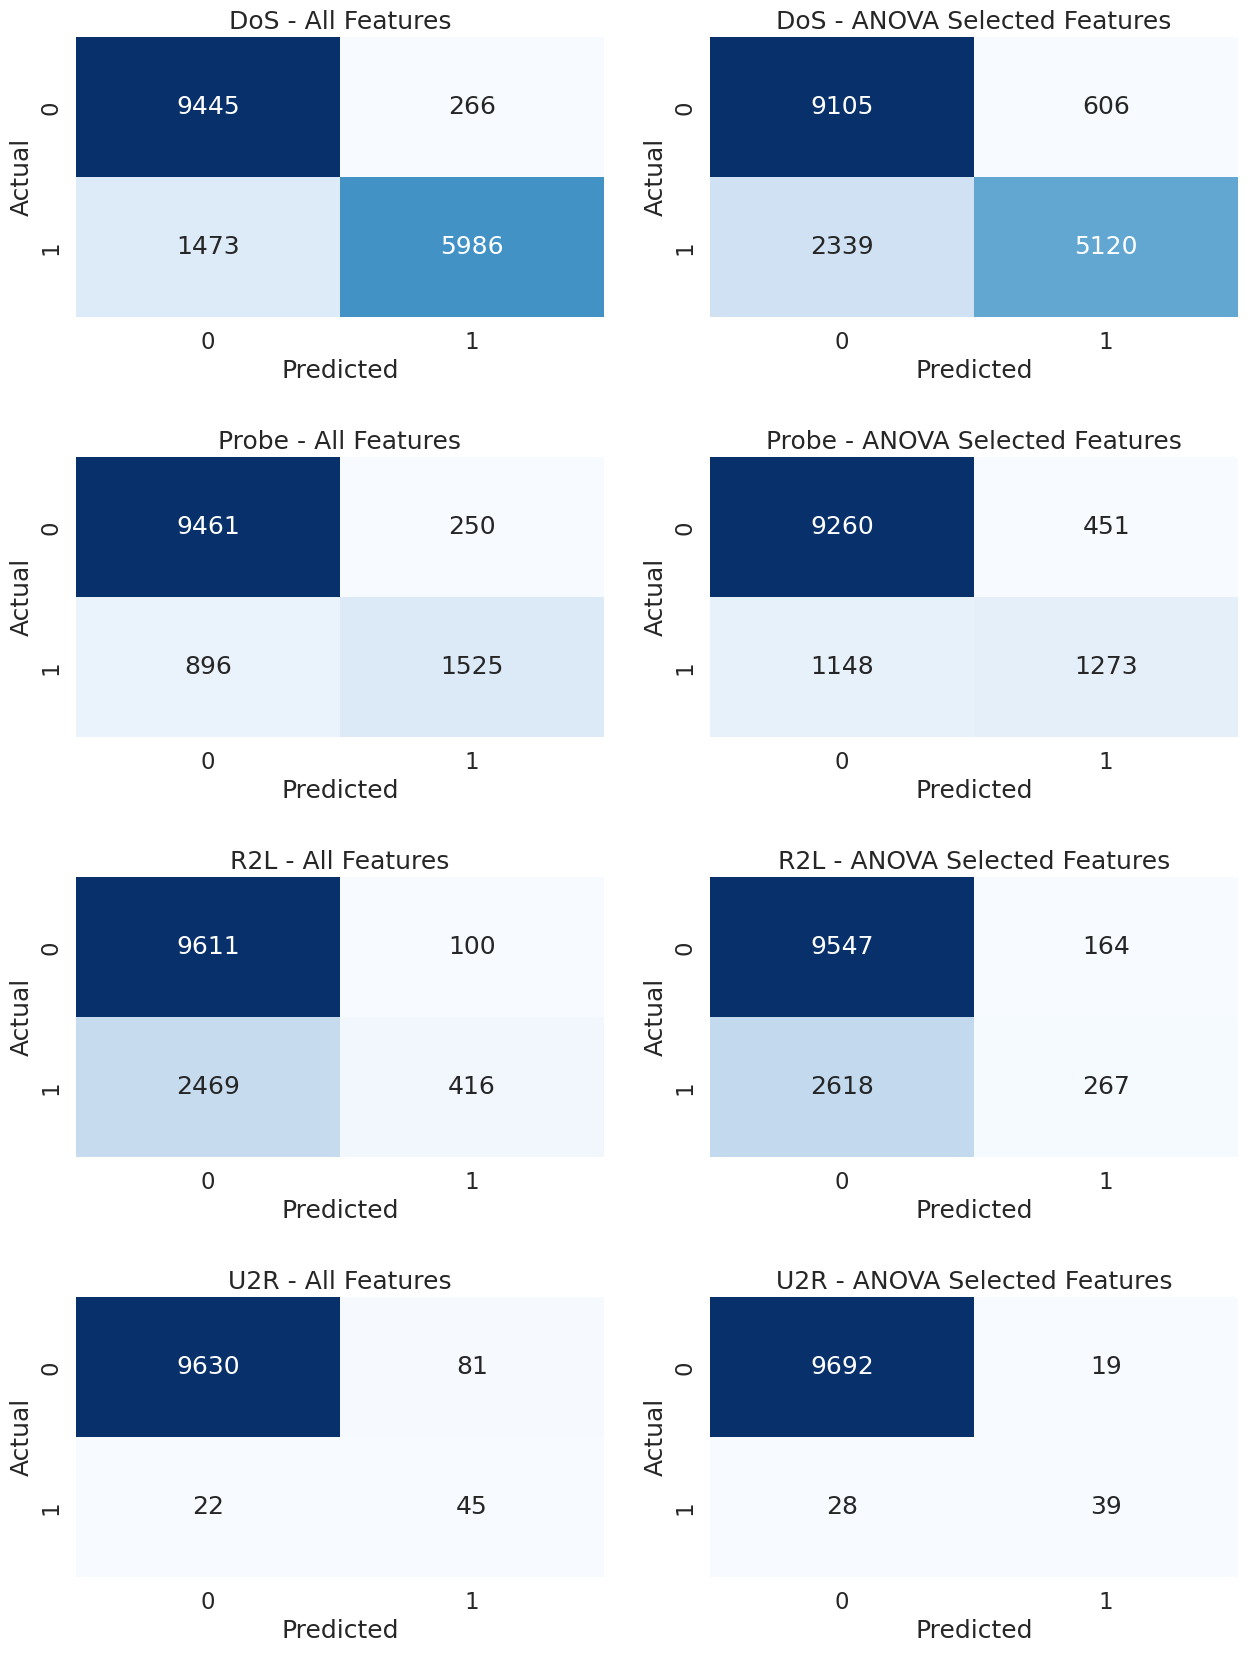

In [ ]:
#define a function to plot confusion matrix
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

#plot confusion matrices for all models
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

#all Features
plot_confusion_matrix(axes[0, 0], cm_DoS_all, "DoS - All Features")
plot_confusion_matrix(axes[1, 0], cm_Probe_all, "Probe - All Features")
plot_confusion_matrix(axes[2, 0], cm_R2L_all, "R2L - All Features")
plot_confusion_matrix(axes[3, 0], cm_U2R_all, "U2R - All Features")

#ANOVA Selected Features
plot_confusion_matrix(axes[0, 1], cm_DoS_anv, "DoS - ANOVA Selected Features")
plot_confusion_matrix(axes[1, 1], cm_Probe_anv, "Probe - ANOVA Selected Features")
plot_confusion_matrix(axes[2, 1], cm_R2L_anv, "R2L - ANOVA Selected Features")
plot_confusion_matrix(axes[3, 1], cm_U2R_anv, "U2R - ANOVA Selected Features")

plt.show()

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#all features
clf1_DoS=KNeighborsClassifier()
clf1_Probe=KNeighborsClassifier()
clf1_R2L=KNeighborsClassifier()
clf1_U2R=KNeighborsClassifier()
clf1_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
clf1_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
clf1_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
clf1_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))

KNeighborsClassifier()

In [ ]:
#selected features with anova
clf1_anvDoS=KNeighborsClassifier()
clf1_anvProbe=KNeighborsClassifier()
clf1_anvR2L=KNeighborsClassifier()
clf1_anvU2R=KNeighborsClassifier()
clf1_anvDoS.fit(X_newDoS, Y_train_DoS.astype(int))
clf1_anvProbe.fit(X_newProbe, Y_train_Probe.astype(int))
clf1_anvR2L.fit(X_newR2L, Y_train_R2L.astype(int))
clf1_anvU2R.fit(X_newU2R, Y_train_U2R.astype(int))

KNeighborsClassifier()

***Prediction***

In [ ]:
#predict using all features
y_pred_DoS_all1 = clf1_DoS.predict(X_test_DoS)
y_pred_Probe_all1 = clf1_Probe.predict(X_test_Probe)
y_pred_R2L_all1 = clf1_R2L.predict(X_test_R2L)
y_pred_U2R_all1 = clf1_U2R.predict(X_test_U2R)

In [ ]:
# Predict using ANOVA-selected features
y_pred_DoS_anv1 = clf1_anvDoS.predict(X_test_DoS[features_DoS])
y_pred_Probe_anv1 = clf1_anvProbe.predict(X_test_Probe[features_Probe])
y_pred_R2L_anv1 = clf1_anvR2L.predict(X_test_R2L[features_R2L])
y_pred_U2R_anv1 = clf1_anvU2R.predict(X_test_U2R[features_U2R])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



##Confusion Matrices + Cross-validation: Accuracy, Precision, Recall, F-measure in a classification report

In [ ]:
def print_evaluation_metrics(y_true, y_pred, label):
    print(f"Confusion Matrix for {label}:")
    print(confusion_matrix(y_true, y_pred))
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_true, y_pred))


In [ ]:

#evaluate models using all features
print_evaluation_metrics(Y_test_DoS.astype(int), y_pred_DoS_all1, "DoS (All Features)")
print_evaluation_metrics(Y_test_Probe.astype(int), y_pred_Probe_all1, "Probe (All Features)")
print_evaluation_metrics(Y_test_R2L.astype(int), y_pred_R2L_all1, "R2L (All Features)")
print_evaluation_metrics(Y_test_U2R.astype(int), y_pred_U2R_all1, "U2R (All Features)")


Confusion Matrix for DoS (All Features):
[[9648   63]
 [1537 5922]]

Classification Report for DoS (All Features):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      9711
           1       0.99      0.79      0.88      7459

    accuracy                           0.91     17170
   macro avg       0.93      0.89      0.90     17170
weighted avg       0.92      0.91      0.90     17170

Confusion Matrix for Probe (All Features):
[[9498  213]
 [ 754 1667]]

Classification Report for Probe (All Features):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9711
           3       0.89      0.69      0.78      2421

    accuracy                           0.92     12132
   macro avg       0.91      0.83      0.86     12132
weighted avg       0.92      0.92      0.92     12132

Confusion Matrix for R2L (All Features):
[[9711    0]
 [2738  147]]

Classification Report for R2L (All Features

In [ ]:
#evaluate models using selected features with ANOVA
print_evaluation_metrics(Y_test_DoS.astype(int), y_pred_DoS_anv1, "DoS (ANOVA Features)")
print_evaluation_metrics(Y_test_Probe.astype(int), y_pred_Probe_anv1, "Probe (ANOVA Features)")
print_evaluation_metrics(Y_test_R2L.astype(int), y_pred_R2L_anv1, "R2L (ANOVA Features)")
print_evaluation_metrics(Y_test_U2R.astype(int), y_pred_U2R_anv1, "U2R (ANOVA Features)")

Confusion Matrix for DoS (ANOVA Features):
[[9289  422]
 [2156 5303]]

Classification Report for DoS (ANOVA Features):
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      9711
           1       0.93      0.71      0.80      7459

    accuracy                           0.85     17170
   macro avg       0.87      0.83      0.84     17170
weighted avg       0.86      0.85      0.85     17170

Confusion Matrix for Probe (ANOVA Features):
[[9524  187]
 [1288 1133]]

Classification Report for Probe (ANOVA Features):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      9711
           3       0.86      0.47      0.61      2421

    accuracy                           0.88     12132
   macro avg       0.87      0.72      0.77     12132
weighted avg       0.88      0.88      0.86     12132

Confusion Matrix for R2L (ANOVA Features):
[[9640   71]
 [2684  201]]

Classification Report for R2L (AN

***Plot of the confusion matrices***

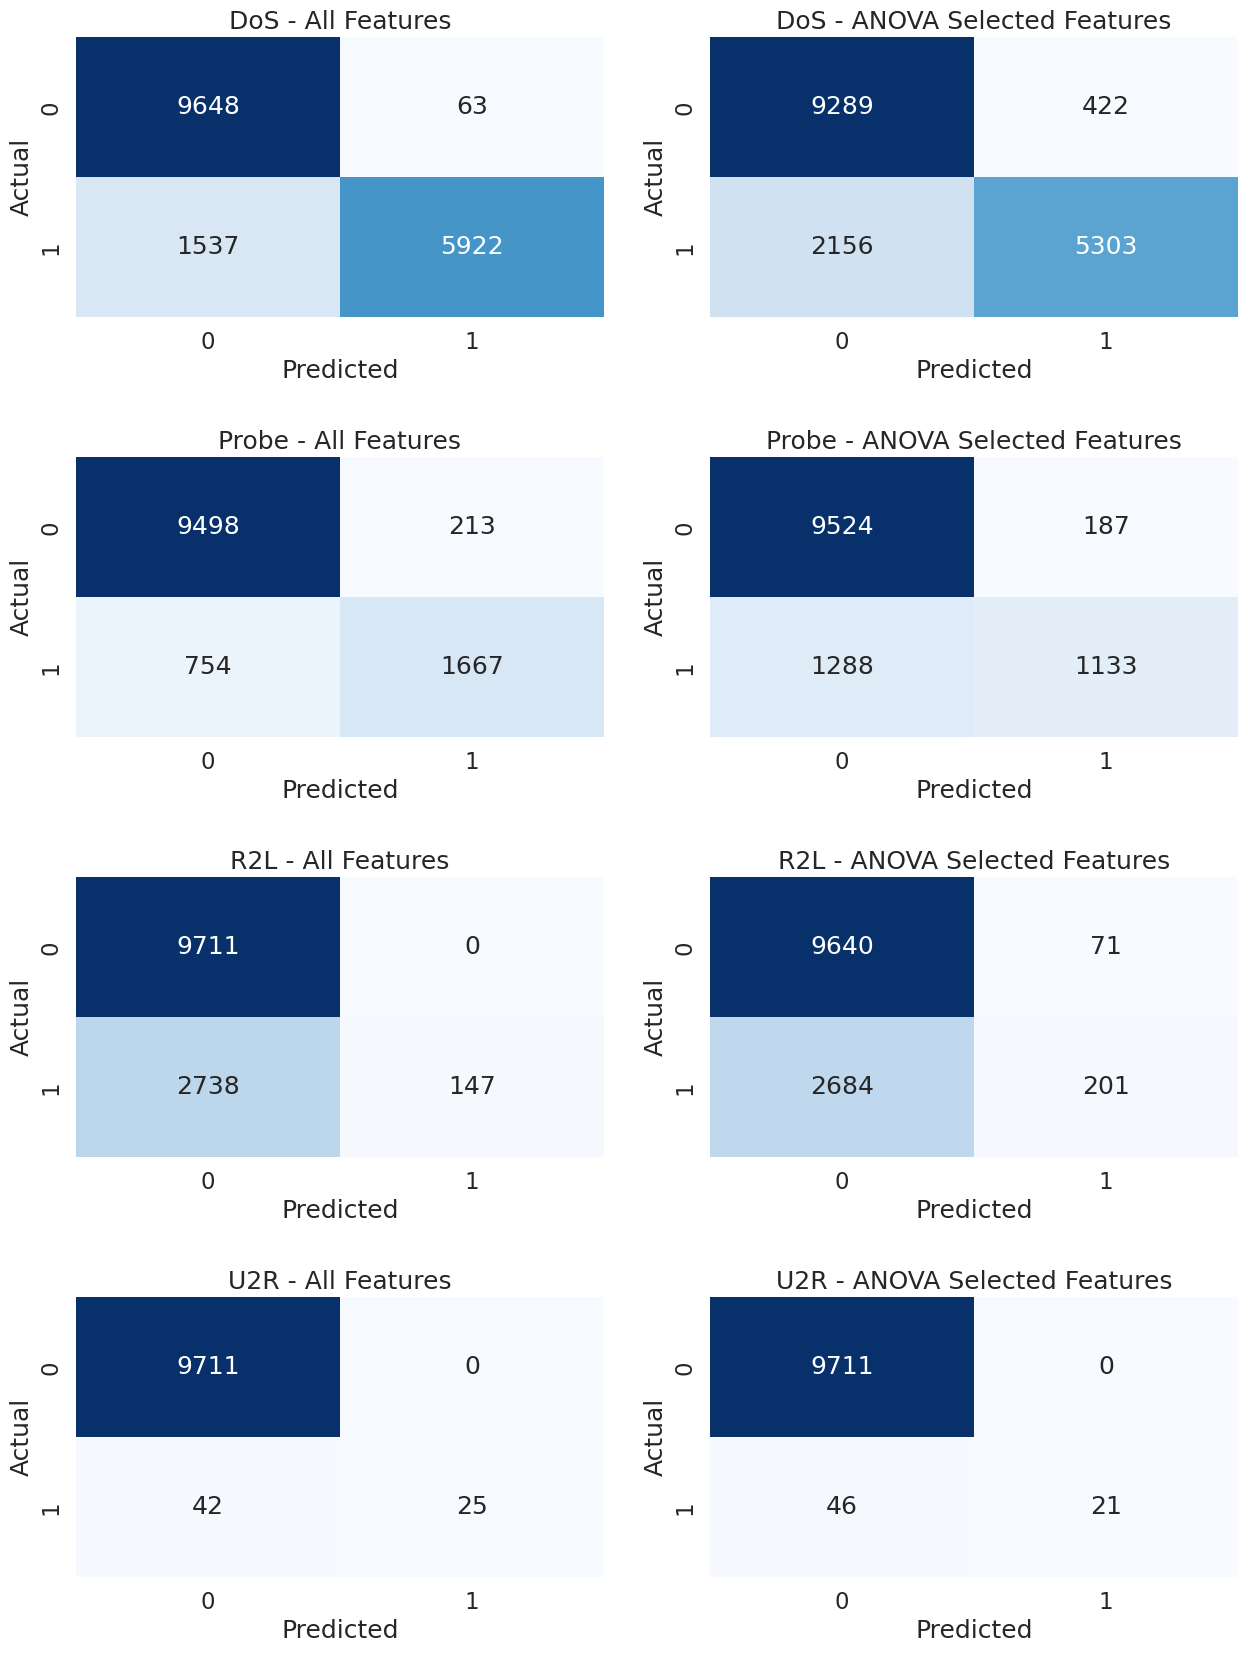

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

#all Features
plot_confusion_matrix(axes[0, 0], confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_all1), "DoS - All Features")
plot_confusion_matrix(axes[1, 0], confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_all1), "Probe - All Features")
plot_confusion_matrix(axes[2, 0], confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_all1), "R2L - All Features")
plot_confusion_matrix(axes[3, 0], confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_all1), "U2R - All Features")

#ANOVA Selected Features
plot_confusion_matrix(axes[0, 1], confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_anv1), "DoS - ANOVA Selected Features")
plot_confusion_matrix(axes[1, 1], confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_anv1), "Probe - ANOVA Selected Features")
plot_confusion_matrix(axes[2, 1], confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_anv1), "R2L - ANOVA Selected Features")
plot_confusion_matrix(axes[3, 1], confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_anv1), "U2R - ANOVA Selected Features")

plt.show()

##SVM

In [ ]:

#ON ALL FEATURES
#create an SVM model
svm_model_DoS = SVC()
svm_model_Probe = SVC()
svm_model_R2L = SVC()
svm_model_U2R = SVC()

#create SVM models for each attack type
svm_model_anvDoS = SVC()
svm_model_anvProbe = SVC()
svm_model_anvR2L = SVC()
svm_model_anvU2R = SVC()



In [ ]:
#fit the SVM models
svm_model_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
svm_model_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
svm_model_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
svm_model_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))



SVC()

In [ ]:
#fit SVM models on the ANOVA-selected features
svm_model_anvDoS.fit(X_newDoS, Y_train_DoS.astype(int))
svm_model_anvProbe.fit(X_newProbe, Y_train_Probe.astype(int))
svm_model_anvR2L.fit(X_newR2L, Y_train_R2L.astype(int))
svm_model_anvU2R.fit(X_newU2R, Y_train_U2R.astype(int))

SVC()

In [ ]:
#make predictions on all features
y_pred_svm_DoS = svm_model_DoS.predict(X_test_DoS)
y_pred_svm_Probe = svm_model_Probe.predict(X_test_Probe)
y_pred_svm_R2L = svm_model_R2L.predict(X_test_R2L)
y_pred_svm_U2R = svm_model_U2R.predict(X_test_U2R)


In [ ]:
#make predictions on the ANOVA-selected features
y_pred_svm_anvDoS = svm_model_anvDoS.predict(X_test_DoS[features_DoS])
y_pred_svm_anvProbe = svm_model_anvProbe.predict(X_test_Probe[features_Probe])
y_pred_svm_anvR2L = svm_model_anvR2L.predict(X_test_R2L[features_R2L])
y_pred_svm_anvU2R = svm_model_anvU2R.predict(X_test_U2R[features_U2R])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



In [ ]:

#print accuracy for SVM
print("Accuracy for SVM - DoS:", accuracy_score(Y_test_DoS.astype(int), y_pred_svm_DoS))
print("Accuracy for SVM - Probe:", accuracy_score(Y_test_Probe.astype(int), y_pred_svm_Probe))
print("Accuracy for SVM - R2L:", accuracy_score(Y_test_R2L.astype(int), y_pred_svm_R2L))
print("Accuracy for SVM - U2R:", accuracy_score(Y_test_U2R.astype(int), y_pred_svm_U2R))

Accuracy for SVM - DoS: 0.8751310425160163
Accuracy for SVM - Probe: 0.9221892515661062
Accuracy for SVM - R2L: 0.8097014925373134
Accuracy for SVM - U2R: 0.9962159950910207


In [ ]:
#print accuracy for SVM on ANOVA-selected features
print("Accuracy for SVM (ANOVA) - DoS:", accuracy_score(Y_test_DoS.astype(int), y_pred_svm_anvDoS))
print("Accuracy for SVM (ANOVA) - Probe:", accuracy_score(Y_test_Probe.astype(int), y_pred_svm_anvProbe))
print("Accuracy for SVM (ANOVA) - R2L:", accuracy_score(Y_test_R2L.astype(int), y_pred_svm_anvR2L))
print("Accuracy for SVM (ANOVA) - U2R:", accuracy_score(Y_test_U2R.astype(int), y_pred_svm_anvU2R))

Accuracy for SVM (ANOVA) - DoS: 0.8334304018637158
Accuracy for SVM (ANOVA) - Probe: 0.8653148697659083
Accuracy for SVM (ANOVA) - R2L: 0.7899333121625913
Accuracy for SVM (ANOVA) - U2R: 0.9953978318674576


In [ ]:

#define a function for printing evaluation metrics
def print_colored_evaluation_metrics(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print((f"Confusion Matrix for {title}:", 'blue'))
    print(cm)

    print((f"\nClassification Report for {title}:", 'blue'))
    print(report)



In [ ]:

#evaluate SVM models on all features
print_colored_evaluation_metrics(Y_test_DoS.astype(int), y_pred_svm_DoS, "SVM (All Features) - DoS")
print_colored_evaluation_metrics(Y_test_Probe.astype(int), y_pred_svm_Probe, "SVM (All Features) - Probe")
print_colored_evaluation_metrics(Y_test_R2L.astype(int), y_pred_svm_R2L, "SVM (All Features) - R2L")
print_colored_evaluation_metrics(Y_test_U2R.astype(int), y_pred_svm_U2R, "SVM (All Features) - U2R")


('Confusion Matrix for SVM (All Features) - DoS:', 'blue')
[[9607  104]
 [2040 5419]]
('\nClassification Report for SVM (All Features) - DoS:', 'blue')
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      9711
           1       0.98      0.73      0.83      7459

    accuracy                           0.88     17170
   macro avg       0.90      0.86      0.87     17170
weighted avg       0.89      0.88      0.87     17170

('Confusion Matrix for SVM (All Features) - Probe:', 'blue')
[[9437  274]
 [ 670 1751]]
('\nClassification Report for SVM (All Features) - Probe:', 'blue')
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9711
           3       0.86      0.72      0.79      2421

    accuracy                           0.92     12132
   macro avg       0.90      0.85      0.87     12132
weighted avg       0.92      0.92      0.92     12132

('Confusion Matrix for SVM (All Featur

In [ ]:
#evaluate SVM models on ANOVA-selected features
print_colored_evaluation_metrics(Y_test_DoS.astype(int), y_pred_svm_anvDoS, "SVM (ANOVA Features) - DoS")
print_colored_evaluation_metrics(Y_test_Probe.astype(int), y_pred_svm_anvProbe, "SVM (ANOVA Features) - Probe")
print_colored_evaluation_metrics(Y_test_R2L.astype(int), y_pred_svm_anvR2L, "SVM (ANOVA Features) - R2L")
print_colored_evaluation_metrics(Y_test_U2R.astype(int), y_pred_svm_anvU2R, "SVM (ANOVA Features) - U2R")

('Confusion Matrix for SVM (ANOVA Features) - DoS:', 'blue')
[[9311  400]
 [2460 4999]]
('\nClassification Report for SVM (ANOVA Features) - DoS:', 'blue')
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      9711
           1       0.93      0.67      0.78      7459

    accuracy                           0.83     17170
   macro avg       0.86      0.81      0.82     17170
weighted avg       0.85      0.83      0.83     17170

('Confusion Matrix for SVM (ANOVA Features) - Probe:', 'blue')
[[9488  223]
 [1411 1010]]
('\nClassification Report for SVM (ANOVA Features) - Probe:', 'blue')
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9711
           3       0.82      0.42      0.55      2421

    accuracy                           0.87     12132
   macro avg       0.84      0.70      0.74     12132
weighted avg       0.86      0.87      0.85     12132

('Confusion Matrix for SVM (AN

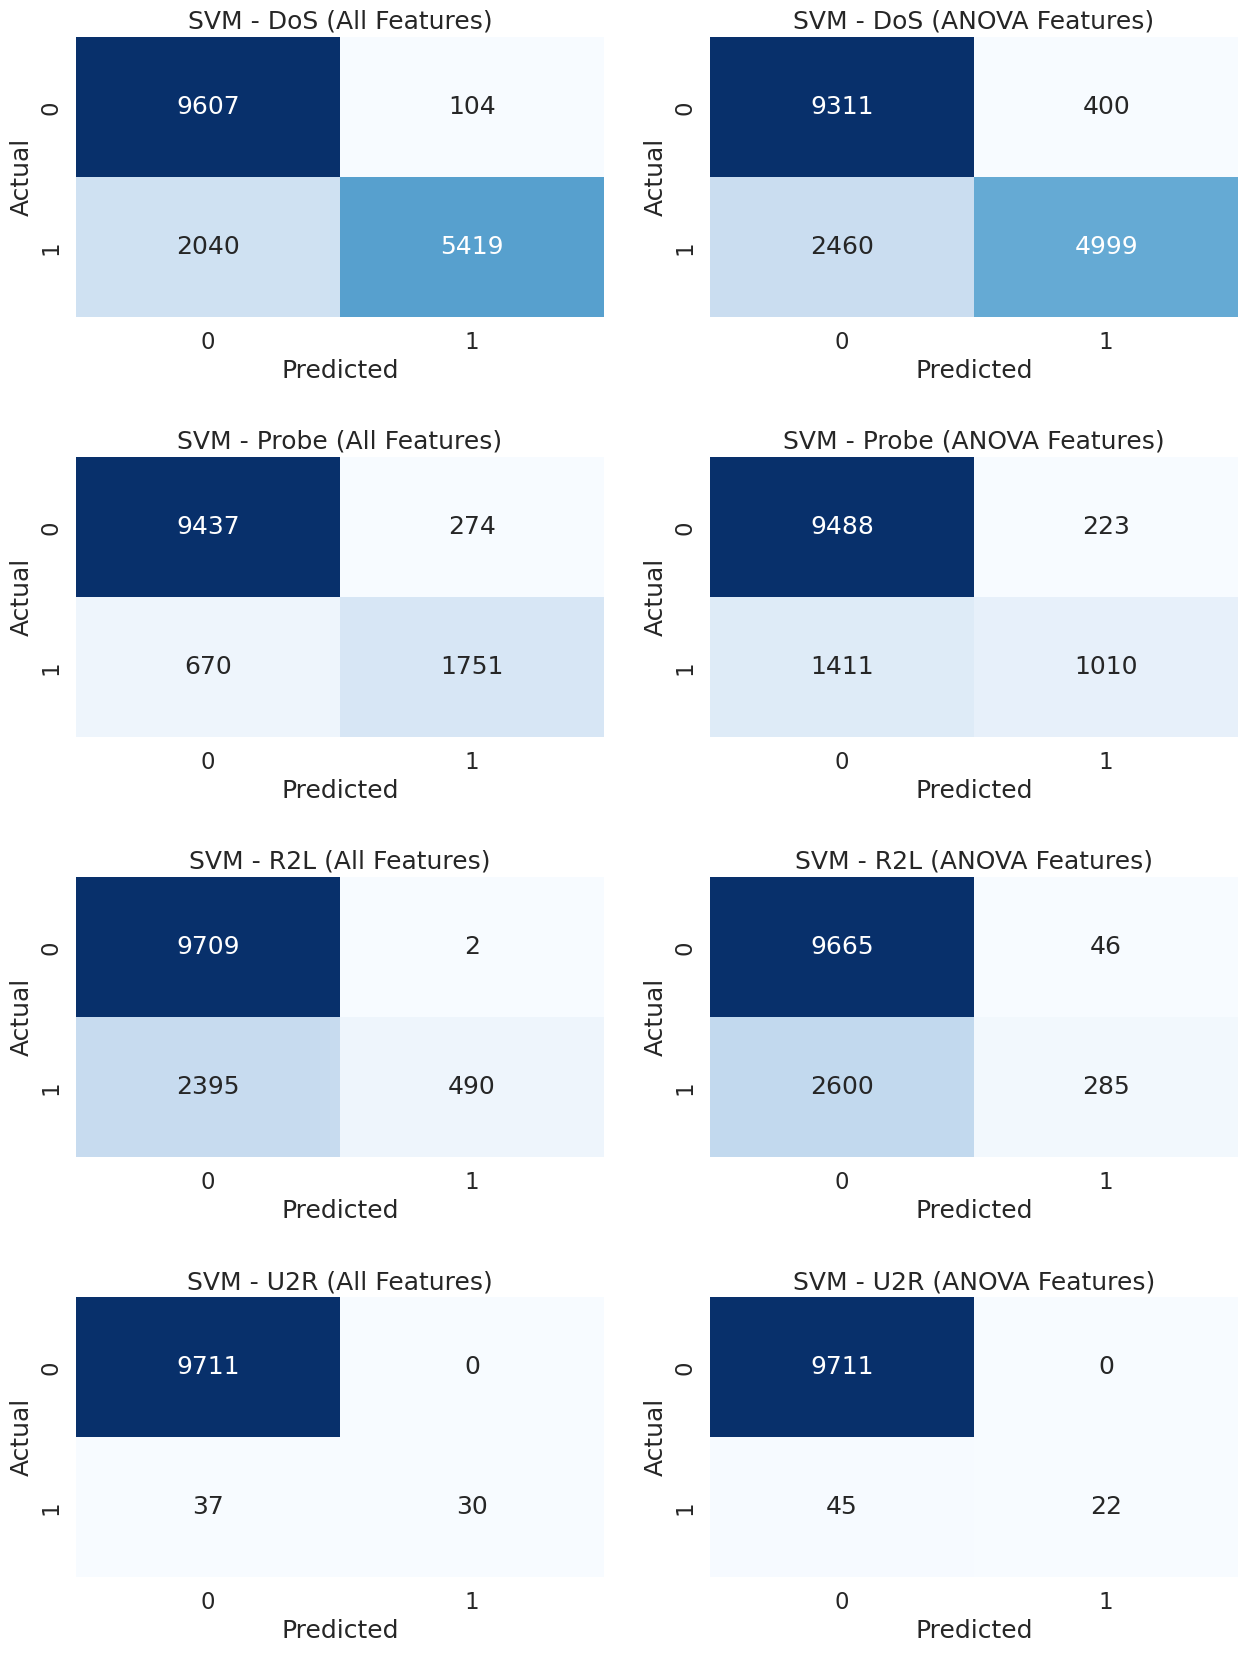

In [ ]:
#plot confusion matrices for SVM models
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

#all Features
plot_confusion_matrix(axes[0, 0], confusion_matrix(Y_test_DoS.astype(int), y_pred_svm_DoS), "SVM - DoS (All Features)")
plot_confusion_matrix(axes[1, 0], confusion_matrix(Y_test_Probe.astype(int), y_pred_svm_Probe), "SVM - Probe (All Features)")
plot_confusion_matrix(axes[2, 0], confusion_matrix(Y_test_R2L.astype(int), y_pred_svm_R2L), "SVM - R2L (All Features)")
plot_confusion_matrix(axes[3, 0], confusion_matrix(Y_test_U2R.astype(int), y_pred_svm_U2R), "SVM - U2R (All Features)")

#ANOVA Selected Features
plot_confusion_matrix(axes[0, 1], confusion_matrix(Y_test_DoS.astype(int), y_pred_svm_anvDoS), "SVM - DoS (ANOVA Features)")
plot_confusion_matrix(axes[1, 1], confusion_matrix(Y_test_Probe.astype(int), y_pred_svm_anvProbe), "SVM - Probe (ANOVA Features)")
plot_confusion_matrix(axes[2, 1], confusion_matrix(Y_test_R2L.astype(int), y_pred_svm_anvR2L), "SVM - R2L (ANOVA Features)")
plot_confusion_matrix(axes[3, 1], confusion_matrix(Y_test_U2R.astype(int), y_pred_svm_anvU2R), "SVM - U2R (ANOVA Features)")

plt.show()


##logistic Regression

###ALL FEATURES

In [ ]:
#initialize Logistic Regression models
logreg_model_DoS = LogisticRegression(random_state=0)
logreg_model_Probe = LogisticRegression(random_state=0)
logreg_model_R2L = LogisticRegression(random_state=0)
logreg_model_U2R = LogisticRegression(random_state=0)

In [ ]:
#fit the models
logreg_model_DoS.fit(X_train_DoS, Y_train_DoS)
logreg_model_Probe.fit(X_train_Probe, Y_train_Probe)
logreg_model_R2L.fit(X_train_R2L, Y_train_R2L)
logreg_model_U2R.fit(X_train_U2R, Y_train_U2R)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

LogisticRegression(random_state=0)

In [ ]:
#make predictions
y_pred_DoS_logreg = logreg_model_DoS.predict(X_test_DoS)
y_pred_Probe_logreg = logreg_model_Probe.predict(X_test_Probe)
y_pred_R2L_logreg = logreg_model_R2L.predict(X_test_R2L)
y_pred_U2R_logreg = logreg_model_U2R.predict(X_test_U2R)

In [ ]:
#evaluate the models
print("Accuracy for DoS (Logistic Regression):", accuracy_score(Y_test_DoS, y_pred_DoS_logreg))
print("Accuracy for Probe (Logistic Regression):", accuracy_score(Y_test_Probe, y_pred_Probe_logreg))
print("Accuracy for R2L (Logistic Regression):", accuracy_score(Y_test_R2L, y_pred_R2L_logreg))
print("Accuracy for U2R (Logistic Regression):", accuracy_score(Y_test_U2R, y_pred_U2R_logreg))

Accuracy for DoS (Logistic Regression): 0.9089691322073383
Accuracy for Probe (Logistic Regression): 0.938344873062974
Accuracy for R2L (Logistic Regression): 0.7966020959034614
Accuracy for U2R (Logistic Regression): 0.9951932910615667


In [ ]:
#print classification reports
print("\nClassification Report for DoS (Logistic Regression):\n", classification_report(Y_test_DoS, y_pred_DoS_logreg))
print("\nClassification Report for Probe (Logistic Regression):\n", classification_report(Y_test_Probe, y_pred_Probe_logreg))
print("\nClassification Report for R2L (Logistic Regression):\n", classification_report(Y_test_R2L, y_pred_R2L_logreg))
print("\nClassification Report for U2R (Logistic Regression):\n", classification_report(Y_test_U2R, y_pred_U2R_logreg))



Classification Report for DoS (Logistic Regression):
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      9711
           1       0.96      0.82      0.89      7459

    accuracy                           0.91     17170
   macro avg       0.92      0.90      0.91     17170
weighted avg       0.91      0.91      0.91     17170


Classification Report for Probe (Logistic Regression):
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      9711
           3       0.87      0.82      0.84      2421

    accuracy                           0.94     12132
   macro avg       0.91      0.89      0.90     12132
weighted avg       0.94      0.94      0.94     12132


Classification Report for R2L (Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           2       0.90      0.13      0.22      2885

    accuracy   

In [ ]:
#print confusion matrices
print("\nConfusion Matrix for DoS (Logistic Regression):\n", confusion_matrix(Y_test_DoS, y_pred_DoS_logreg))
print("\nConfusion Matrix for Probe (Logistic Regression):\n", confusion_matrix(Y_test_Probe, y_pred_Probe_logreg))
print("\nConfusion Matrix for R2L (Logistic Regression):\n", confusion_matrix(Y_test_R2L, y_pred_R2L_logreg))
print("\nConfusion Matrix for U2R (Logistic Regression):\n", confusion_matrix(Y_test_U2R, y_pred_U2R_logreg))


Confusion Matrix for DoS (Logistic Regression):
 [[9479  232]
 [1331 6128]]

Confusion Matrix for Probe (Logistic Regression):
 [[9405  306]
 [ 442 1979]]

Confusion Matrix for R2L (Logistic Regression):
 [[9672   39]
 [2523  362]]

Confusion Matrix for U2R (Logistic Regression):
 [[9711    0]
 [  47   20]]


### ANOVA FEATURES

In [ ]:
#initialize Logistic Regression models for ANOVA-selected features
logreg_anv_model_DoS = LogisticRegression(random_state=0)
logreg_anv_model_Probe = LogisticRegression(random_state=0)
logreg_anv_model_R2L = LogisticRegression(random_state=0)
logreg_anv_model_U2R = LogisticRegression(random_state=0)

In [ ]:
#fit the models on ANOVA-selected features
logreg_anv_model_DoS.fit(X_newDoS, Y_train_DoS)
logreg_anv_model_Probe.fit(X_newProbe, Y_train_Probe)
logreg_anv_model_R2L.fit(X_newR2L, Y_train_R2L)
logreg_anv_model_U2R.fit(X_newU2R, Y_train_U2R)

LogisticRegression(random_state=0)

In [ ]:
#make predictions on ANOVA-selected features
y_pred_DoS_logreg_anv = logreg_anv_model_DoS.predict(X_test_DoS[features_DoS])
y_pred_Probe_logreg_anv = logreg_anv_model_Probe.predict(X_test_Probe[features_Probe])
y_pred_R2L_logreg_anv = logreg_anv_model_R2L.predict(X_test_R2L[features_R2L])
y_pred_U2R_logreg_anv = logreg_anv_model_U2R.predict(X_test_U2R[features_U2R])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [ ]:
#evaluate the models on ANOVA-selected features
print("Accuracy for DoS (Logistic Regression - ANOVA):", accuracy_score(Y_test_DoS, y_pred_DoS_logreg_anv))
print("Accuracy for Probe (Logistic Regression - ANOVA):", accuracy_score(Y_test_Probe, y_pred_Probe_logreg_anv))
print("Accuracy for R2L (Logistic Regression - ANOVA):", accuracy_score(Y_test_R2L, y_pred_R2L_logreg_anv))
print("Accuracy for U2R (Logistic Regression - ANOVA):", accuracy_score(Y_test_U2R, y_pred_U2R_logreg_anv))


Accuracy for DoS (Logistic Regression - ANOVA): 0.8397204426324986
Accuracy for Probe (Logistic Regression - ANOVA): 0.8972964061984834
Accuracy for R2L (Logistic Regression - ANOVA): 0.7905684344236266
Accuracy for U2R (Logistic Regression - ANOVA): 0.994477398240949


In [ ]:
#print classification reports for ANOVA-selected features
print("\nClassification Report for DoS (Logistic Regression - ANOVA):\n", classification_report(Y_test_DoS, y_pred_DoS_logreg_anv))
print("\nClassification Report for Probe (Logistic Regression - ANOVA):\n", classification_report(Y_test_Probe, y_pred_Probe_logreg_anv))
print("\nClassification Report for R2L (Logistic Regression - ANOVA):\n", classification_report(Y_test_R2L, y_pred_R2L_logreg_anv))
print("\nClassification Report for U2R (Logistic Regression - ANOVA):\n", classification_report(Y_test_U2R, y_pred_U2R_logreg_anv))


Classification Report for DoS (Logistic Regression - ANOVA):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      9711
           1       0.91      0.70      0.79      7459

    accuracy                           0.84     17170
   macro avg       0.86      0.82      0.83     17170
weighted avg       0.85      0.84      0.84     17170


Classification Report for Probe (Logistic Regression - ANOVA):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9711
           3       0.83      0.61      0.70      2421

    accuracy                           0.90     12132
   macro avg       0.87      0.79      0.82     12132
weighted avg       0.89      0.90      0.89     12132


Classification Report for R2L (Logistic Regression - ANOVA):
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      9711
           2       0.73      0.14      0.23   

In [ ]:
#print confusion matrices for ANOVA-selected features
print("\nConfusion Matrix for DoS (Logistic Regression - ANOVA):\n", confusion_matrix(Y_test_DoS, y_pred_DoS_logreg_anv))
print("\nConfusion Matrix for Probe (Logistic Regression - ANOVA):\n", confusion_matrix(Y_test_Probe, y_pred_Probe_logreg_anv))
print("\nConfusion Matrix for R2L (Logistic Regression - ANOVA):\n", confusion_matrix(Y_test_R2L, y_pred_R2L_logreg_anv))
print("\nConfusion Matrix for U2R (Logistic Regression - ANOVA):\n", confusion_matrix(Y_test_U2R, y_pred_U2R_logreg_anv))


Confusion Matrix for DoS (Logistic Regression - ANOVA):
 [[9202  509]
 [2243 5216]]

Confusion Matrix for Probe (Logistic Regression - ANOVA):
 [[9403  308]
 [ 938 1483]]

Confusion Matrix for R2L (Logistic Regression - ANOVA):
 [[9561  150]
 [2488  397]]

Confusion Matrix for U2R (Logistic Regression - ANOVA):
 [[9711    0]
 [  54   13]]


###Confusion Matrices + Cross-validation: Accuracy, Precision, Recall, F-measure in a classification report

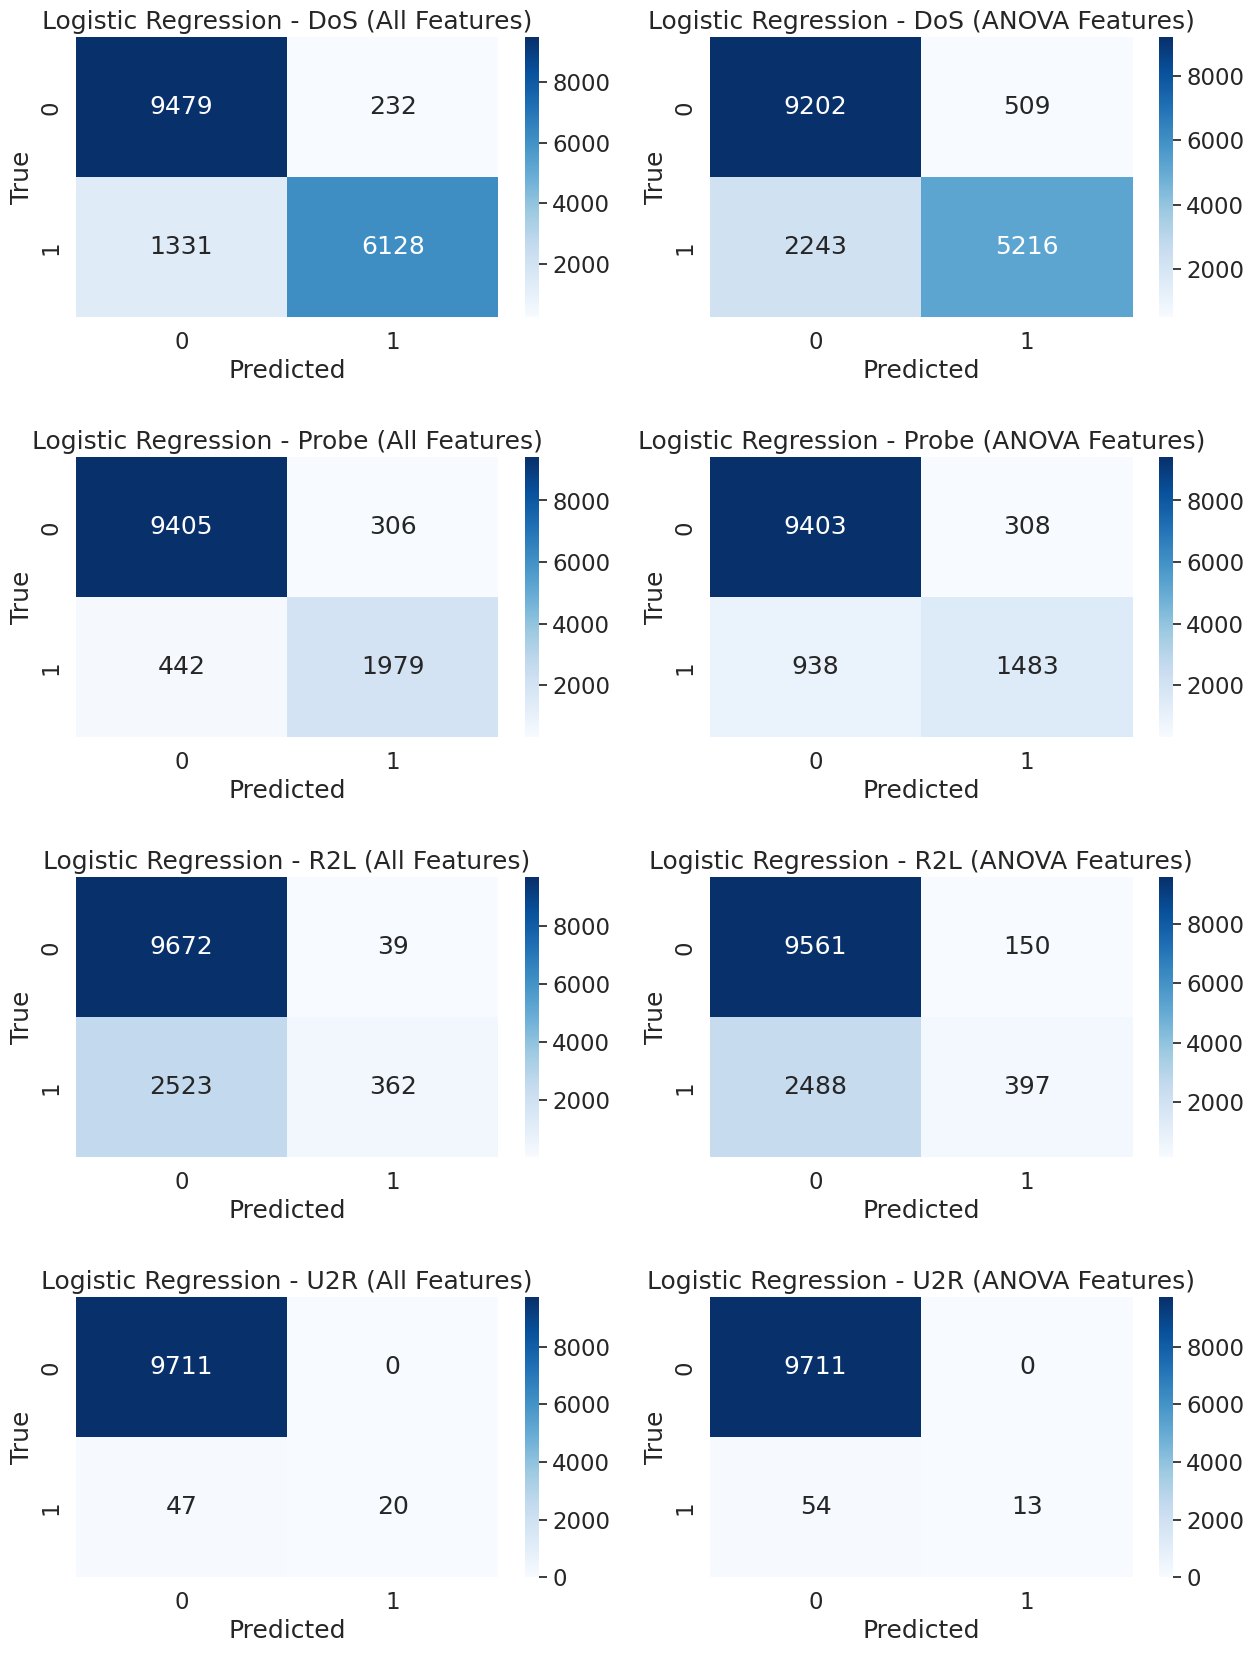

In [ ]:
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

#plot confusion matrices for logistic regression models
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

#all Features
plot_confusion_matrix(axes[0, 0], confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_logreg), "Logistic Regression - DoS (All Features)")
plot_confusion_matrix(axes[1, 0], confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_logreg), "Logistic Regression - Probe (All Features)")
plot_confusion_matrix(axes[2, 0], confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_logreg), "Logistic Regression - R2L (All Features)")
plot_confusion_matrix(axes[3, 0], confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_logreg), "Logistic Regression - U2R (All Features)")

#ANOVA Selected Features
plot_confusion_matrix(axes[0, 1], confusion_matrix(Y_test_DoS.astype(int), y_pred_DoS_logreg_anv), "Logistic Regression - DoS (ANOVA Features)")
plot_confusion_matrix(axes[1, 1], confusion_matrix(Y_test_Probe.astype(int), y_pred_Probe_logreg_anv), "Logistic Regression - Probe (ANOVA Features)")
plot_confusion_matrix(axes[2, 1], confusion_matrix(Y_test_R2L.astype(int), y_pred_R2L_logreg_anv), "Logistic Regression - R2L (ANOVA Features)")
plot_confusion_matrix(axes[3, 1], confusion_matrix(Y_test_U2R.astype(int), y_pred_U2R_logreg_anv), "Logistic Regression - U2R (ANOVA Features)")

plt.show()

###Comparation between DecisionTree KNN SVM LGR


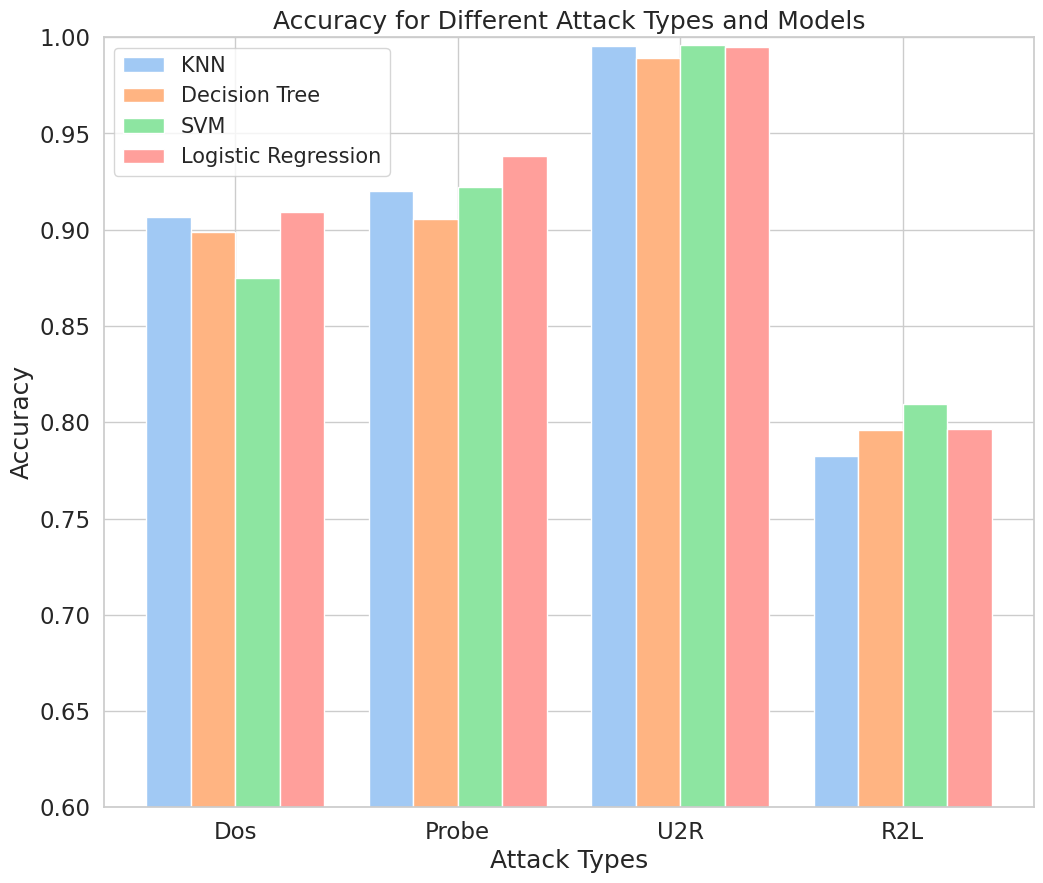

In [ ]:
pred_list_knn = [y_pred_DoS_all1, y_pred_Probe_all1, y_pred_U2R_all1, y_pred_R2L_all1]
pred_list_tree = [y_pred_DoS_all, y_pred_Probe_all, y_pred_U2R_all, y_pred_R2L_all]
pred_list_svm = [y_pred_svm_DoS, y_pred_svm_Probe, y_pred_svm_U2R, y_pred_svm_R2L]
pred_list_lgr = [y_pred_DoS_logreg, y_pred_Probe_logreg, y_pred_U2R_logreg, y_pred_R2L_logreg]

y_test_list = [Y_test_DoS, Y_test_Probe, Y_test_U2R, Y_test_R2L]

accuracy_list_knn = []
accuracy_list_dt = []
accuracy_list_svm = []
accuracy_list_lgr = []
attack_types = ['Dos', 'Probe', 'U2R', 'R2L']

for i in range(4):
    accuracy_knn = accuracy_score(y_test_list[i], pred_list_knn[i])
    accuracy_list_knn.append(accuracy_knn)

    accuracy_tree = accuracy_score(y_test_list[i], pred_list_tree[i])
    accuracy_list_dt.append(accuracy_tree)

    accuracy_svm = accuracy_score(y_test_list[i], pred_list_svm[i])
    accuracy_list_svm.append(accuracy_svm)

    accuracy_lgr = accuracy_score(y_test_list[i], pred_list_lgr[i])
    accuracy_list_lgr.append(accuracy_lgr)

#plotting the bar graph
bar_width = 0.2
index = range(len(attack_types))
fig, ax = plt.subplots(figsize=(12, 10))

bar1 = ax.bar(index, accuracy_list_knn, bar_width, label='KNN')
bar2 = ax.bar([i + bar_width for i in index], accuracy_list_dt, bar_width, label='Decision Tree')
bar3 = ax.bar([i + 2 * bar_width for i in index], accuracy_list_svm, bar_width, label='SVM')
bar4 = ax.bar([i + 3 * bar_width for i in index], accuracy_list_lgr, bar_width, label='Logistic Regression')

ax.set_xlabel('Attack Types')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Attack Types and Models')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(attack_types)
ax.legend(fontsize='small')

plt.ylim(0.6, 1.0)
plt.show()

##Ensemble learning models

##RANDOM FOREST : Bagging (Bootstrap Aggregating)

###ALL FEATURES

In [ ]:
#Random Forest model for DoS
rf_model_DoS = RandomForestClassifier(random_state=0)
rf_model_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
y_pred_rf_DoS = rf_model_DoS.predict(X_test_DoS)

In [ ]:
#Random Forest model for Probe
rf_model_Probe = RandomForestClassifier(random_state=0)
rf_model_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
y_pred_rf_Probe = rf_model_Probe.predict(X_test_Probe)


In [ ]:
#Random Forest model for R2L
rf_model_R2L = RandomForestClassifier(random_state=0)
rf_model_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
y_pred_rf_R2L = rf_model_R2L.predict(X_test_R2L)

In [ ]:
#Random Forest model for U2R
rf_model_U2R = RandomForestClassifier(random_state=0)
rf_model_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))
y_pred_rf_U2R = rf_model_U2R.predict(X_test_U2R)

In [ ]:
#evaluate Random Forest models
print("Accuracy for DoS (Random Forest):", accuracy_score(Y_test_DoS.astype(int), y_pred_rf_DoS))
print("Accuracy for Probe (Random Forest):", accuracy_score(Y_test_Probe.astype(int), y_pred_rf_Probe))
print("Accuracy for R2L (Random Forest):", accuracy_score(Y_test_R2L.astype(int), y_pred_rf_R2L))
print("Accuracy for U2R (Random Forest):", accuracy_score(Y_test_U2R.astype(int), y_pred_rf_U2R))

Accuracy for DoS (Random Forest): 0.8816540477577169
Accuracy for Probe (Random Forest): 0.8823771843059677
Accuracy for R2L (Random Forest): 0.7733407430930455
Accuracy for U2R (Random Forest): 0.993659235017386


In [ ]:
#print confusion matrices and classification reports
print("\nConfusion Matrix for DoS (Random Forest):\n", confusion_matrix(Y_test_DoS.astype(int), y_pred_rf_DoS))
print("\nClassification Report for DoS (Random Forest):\n", classification_report(Y_test_DoS.astype(int), y_pred_rf_DoS))

print("\nConfusion Matrix for Probe (Random Forest):\n", confusion_matrix(Y_test_Probe.astype(int), y_pred_rf_Probe))
print("\nClassification Report for Probe (Random Forest):\n", classification_report(Y_test_Probe.astype(int), y_pred_rf_Probe))

print("\nConfusion Matrix for R2L (Random Forest):\n", confusion_matrix(Y_test_R2L.astype(int), y_pred_rf_R2L))
print("\nClassification Report for R2L (Random Forest):\n", classification_report(Y_test_R2L.astype(int), y_pred_rf_R2L))

print("\nConfusion Matrix for U2R (Random Forest):\n", confusion_matrix(Y_test_U2R.astype(int), y_pred_rf_U2R))
print("\nClassification Report for U2R (Random Forest):\n", classification_report(Y_test_U2R.astype(int), y_pred_rf_U2R))


Confusion Matrix for DoS (Random Forest):
 [[9651   60]
 [1972 5487]]

Classification Report for DoS (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      9711
           1       0.99      0.74      0.84      7459

    accuracy                           0.88     17170
   macro avg       0.91      0.86      0.87     17170
weighted avg       0.90      0.88      0.88     17170


Confusion Matrix for Probe (Random Forest):
 [[9485  226]
 [1201 1220]]

Classification Report for Probe (Random Forest):
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      9711
           3       0.84      0.50      0.63      2421

    accuracy                           0.88     12132
   macro avg       0.87      0.74      0.78     12132
weighted avg       0.88      0.88      0.87     12132


Confusion Matrix for R2L (Random Forest):
 [[9711    0]
 [2855   30]]

Classification Report for R2L 

### FEATURES USING ANOVA

In [ ]:
#create Random Forest models for each attack type
rf_model_anvDoS = RandomForestClassifier(random_state=0)
rf_model_anvProbe = RandomForestClassifier(random_state=0)
rf_model_anvR2L = RandomForestClassifier(random_state=0)
rf_model_anvU2R = RandomForestClassifier(random_state=0)


In [ ]:
#fit Random Forest models on the ANOVA-selected features
rf_model_anvDoS.fit(X_newDoS, Y_train_DoS.astype(int))
rf_model_anvProbe.fit(X_newProbe, Y_train_Probe.astype(int))
rf_model_anvR2L.fit(X_newR2L, Y_train_R2L.astype(int))
rf_model_anvU2R.fit(X_newU2R, Y_train_U2R.astype(int))

RandomForestClassifier(random_state=0)

In [ ]:
#make predictions on the ANOVA-selected features
y_pred_rf_anvDoS = rf_model_anvDoS.predict(X_test_DoS[features_DoS])
y_pred_rf_anvProbe = rf_model_anvProbe.predict(X_test_Probe[features_Probe])
y_pred_rf_anvR2L = rf_model_anvR2L.predict(X_test_R2L[features_R2L])
y_pred_rf_anvU2R = rf_model_anvU2R.predict(X_test_U2R[features_U2R])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [ ]:
#print accuracy for Random Forest on ANOVA-selected features
print("Accuracy for Random Forest (ANOVA) - DoS:", accuracy_score(Y_test_DoS.astype(int), y_pred_rf_anvDoS))
print("Accuracy for Random Forest (ANOVA) - Probe:", accuracy_score(Y_test_Probe.astype(int), y_pred_rf_anvProbe))
print("Accuracy for Random Forest (ANOVA) - R2L:", accuracy_score(Y_test_R2L.astype(int), y_pred_rf_anvR2L))
print("Accuracy for Random Forest (ANOVA) - U2R:", accuracy_score(Y_test_U2R.astype(int), y_pred_rf_anvU2R))

Accuracy for Random Forest (ANOVA) - DoS: 0.8354688410017472
Accuracy for Random Forest (ANOVA) - Probe: 0.8710023079459281
Accuracy for Random Forest (ANOVA) - R2L: 0.7718323277230867
Accuracy for Random Forest (ANOVA) - U2R: 0.9956023726733483


In [ ]:

#obtain confusion matrices for Random Forest on ANOVA-selected features
cm_rf_anvDoS = confusion_matrix(Y_test_DoS.astype(int), y_pred_rf_anvDoS)
cm_rf_anvProbe = confusion_matrix(Y_test_Probe.astype(int), y_pred_rf_anvProbe)
cm_rf_anvR2L = confusion_matrix(Y_test_R2L.astype(int), y_pred_rf_anvR2L)
cm_rf_anvU2R = confusion_matrix(Y_test_U2R.astype(int), y_pred_rf_anvU2R)

#print confusion matrices
print("Confusion Matrix for Random Forest (ANOVA) - DoS:")
print(cm_rf_anvDoS)

print("\nConfusion Matrix for Random Forest (ANOVA) - Probe:")
print(cm_rf_anvProbe)

print("\nConfusion Matrix for Random Forest (ANOVA) - R2L:")
print(cm_rf_anvR2L)

print("\nConfusion Matrix for Random Forest (ANOVA) - U2R:")
print(cm_rf_anvU2R)


Confusion Matrix for Random Forest (ANOVA) - DoS:
[[9244  467]
 [2358 5101]]

Confusion Matrix for Random Forest (ANOVA) - Probe:
[[9415  296]
 [1269 1152]]

Confusion Matrix for Random Forest (ANOVA) - R2L:
[[9685   26]
 [2848   37]]

Confusion Matrix for Random Forest (ANOVA) - U2R:
[[9711    0]
 [  43   24]]


In [ ]:
#DoS
print("\nConfusion Matrix for DoS (Random Forest - ANOVA):\n", confusion_matrix(Y_test_DoS.astype(int), y_pred_rf_anvDoS))
print("\nClassification Report for DoS (Random Forest - ANOVA):\n", classification_report(Y_test_DoS.astype(int), y_pred_rf_anvDoS))

#Probe
print("\nConfusion Matrix for Probe (Random Forest - ANOVA):\n", confusion_matrix(Y_test_Probe.astype(int), y_pred_rf_anvProbe))
print("\nClassification Report for Probe (Random Forest - ANOVA):\n", classification_report(Y_test_Probe.astype(int), y_pred_rf_anvProbe))

#R2L
print("\nConfusion Matrix for R2L (Random Forest - ANOVA):\n", confusion_matrix(Y_test_R2L.astype(int), y_pred_rf_anvR2L))
print("\nClassification Report for R2L (Random Forest - ANOVA):\n", classification_report(Y_test_R2L.astype(int), y_pred_rf_anvR2L))

#U2R
print("\nConfusion Matrix for U2R (Random Forest - ANOVA):\n", confusion_matrix(Y_test_U2R.astype(int), y_pred_rf_anvU2R))
print("\nClassification Report for U2R (Random Forest - ANOVA):\n", classification_report(Y_test_U2R.astype(int), y_pred_rf_anvU2R))


Confusion Matrix for DoS (Random Forest - ANOVA):
 [[9244  467]
 [2358 5101]]

Classification Report for DoS (Random Forest - ANOVA):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      9711
           1       0.92      0.68      0.78      7459

    accuracy                           0.84     17170
   macro avg       0.86      0.82      0.83     17170
weighted avg       0.85      0.84      0.83     17170


Confusion Matrix for Probe (Random Forest - ANOVA):
 [[9415    0  296]
 [1269    0 1152]
 [   0    0    0]]

Classification Report for Probe (Random Forest - ANOVA):
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      9711
           1       0.00      0.00      0.00      2421
           3       0.00      0.00      0.00         0

    accuracy                           0.78     12132
   macro avg       0.29      0.32      0.31     12132
weighted avg       0.71      0.78      0.74

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont


Confusion Matrix for U2R (Random Forest - ANOVA):
 [[9711    0    0]
 [  43    0   24]
 [   0    0    0]]

Classification Report for U2R (Random Forest - ANOVA):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.00      0.00      0.00        67
           4       0.00      0.00      0.00         0

    accuracy                           0.99      9778
   macro avg       0.33      0.33      0.33      9778
weighted avg       0.99      0.99      0.99      9778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

###Confusion Matrices + Cross-validation: Accuracy, Precision, Recall, F-measure in a classification report

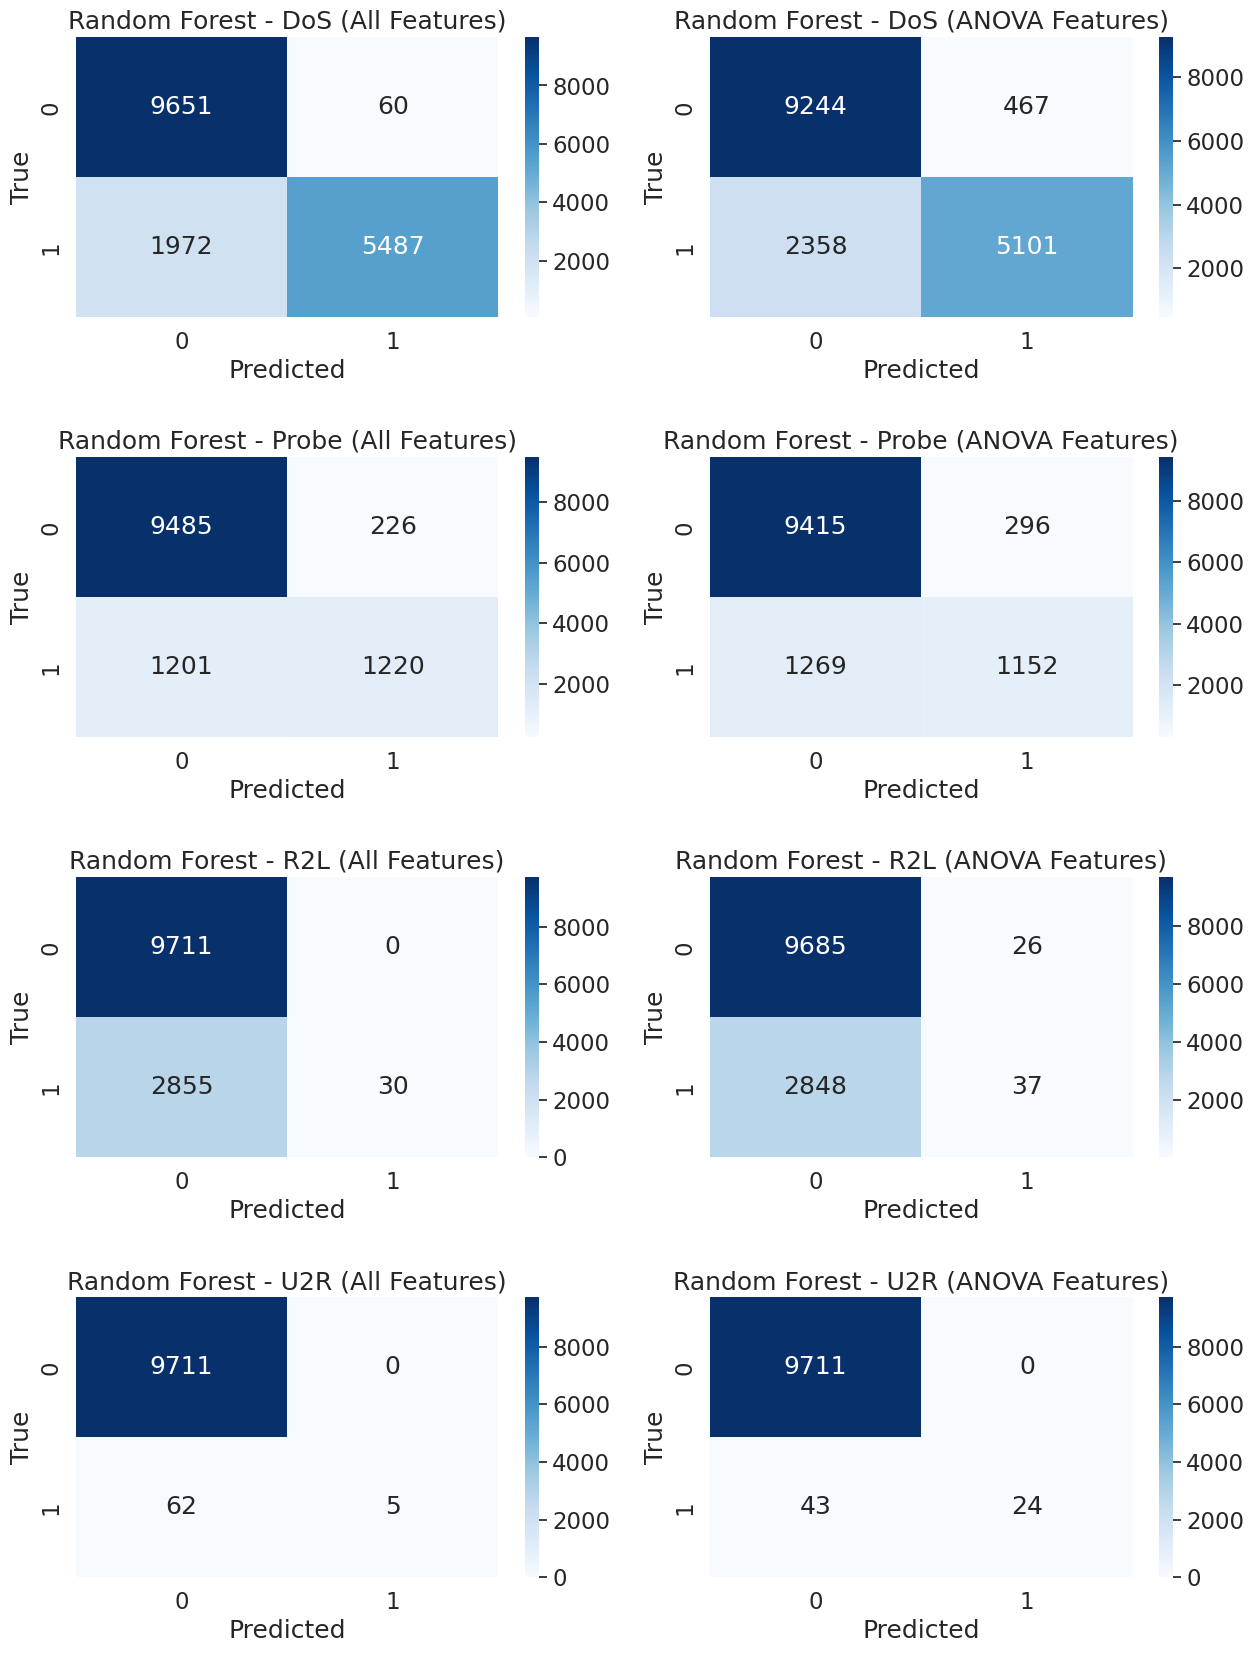

In [ ]:
#plot confusion matrices for Random Forest models
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

#all Features
plot_confusion_matrix(axes[0, 0], confusion_matrix(Y_test_DoS.astype(int), y_pred_rf_DoS), "Random Forest - DoS (All Features)")
plot_confusion_matrix(axes[1, 0], confusion_matrix(Y_test_Probe.astype(int), y_pred_rf_Probe), "Random Forest - Probe (All Features)")
plot_confusion_matrix(axes[2, 0], confusion_matrix(Y_test_R2L.astype(int), y_pred_rf_R2L), "Random Forest - R2L (All Features)")
plot_confusion_matrix(axes[3, 0], confusion_matrix(Y_test_U2R.astype(int), y_pred_rf_U2R), "Random Forest - U2R (All Features)")

#ANOVA Selected Features
plot_confusion_matrix(axes[0, 1], confusion_matrix(Y_test_DoS.astype(int), y_pred_rf_anvDoS), "Random Forest - DoS (ANOVA Features)")
plot_confusion_matrix(axes[1, 1], confusion_matrix(Y_test_Probe.astype(int), y_pred_rf_anvProbe), "Random Forest - Probe (ANOVA Features)")
plot_confusion_matrix(axes[2, 1], confusion_matrix(Y_test_R2L.astype(int), y_pred_rf_anvR2L), "Random Forest - R2L (ANOVA Features)")
plot_confusion_matrix(axes[3, 1], confusion_matrix(Y_test_U2R.astype(int), y_pred_rf_anvU2R), "Random Forest - U2R (ANOVA Features)")

plt.show()


##Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
#Create Voting Classifiers
clf_voting_DoS = VotingClassifier(estimators=[('knn', clf1_DoS), ('svm', svm_model_DoS)], voting='hard')
clf_voting_Probe = VotingClassifier(estimators=[('knn', clf1_Probe), ('svm', svm_model_Probe)], voting='hard')
clf_voting_R2L = VotingClassifier(estimators=[('knn', clf1_R2L), ('svm', svm_model_R2L)], voting='hard')
clf_voting_U2R = VotingClassifier(estimators=[('knn', clf1_U2R), ('svm',svm_model_U2R)], voting='hard')

In [ ]:
#Fit Voting Classifiers on training data
clf_voting_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
clf_voting_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
clf_voting_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
clf_voting_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))


VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svm', SVC())])

In [ ]:

#Make predictions on test data
y_pred_voting_DoS = clf_voting_DoS.predict(X_test_DoS)
y_pred_voting_Probe = clf_voting_Probe.predict(X_test_Probe)
y_pred_voting_R2L = clf_voting_R2L.predict(X_test_R2L)
y_pred_voting_U2R = clf_voting_U2R.predict(X_test_U2R)

In [ ]:
#DoS
print("Accuracy for DoS (Voting Classifier):", accuracy_score(Y_test_DoS.astype(int), y_pred_voting_DoS))
print("\nClassification Report for DoS (Voting Classifier):\n", classification_report(Y_test_DoS.astype(int), y_pred_voting_DoS))
print("\nConfusion Matrix for DoS (Voting Classifier):\n", confusion_matrix(Y_test_DoS.astype(int), y_pred_voting_DoS))

Accuracy for DoS (Voting Classifier): 0.8571927781013395

Classification Report for DoS (Voting Classifier):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      9711
           1       0.99      0.68      0.80      7459

    accuracy                           0.86     17170
   macro avg       0.90      0.84      0.85     17170
weighted avg       0.88      0.86      0.85     17170


Confusion Matrix for DoS (Voting Classifier):
 [[9664   47]
 [2405 5054]]


In [ ]:
#Probe
y_pred_voting_Probe = clf_voting_Probe.predict(X_test_Probe)
print("Accuracy for Probe (Voting Classifier):", accuracy_score(Y_test_Probe.astype(int), y_pred_voting_Probe))
print("\nClassification Report for Probe (Voting Classifier):\n", classification_report(Y_test_Probe.astype(int), y_pred_voting_Probe))
print("\nConfusion Matrix for Probe (Voting Classifier):\n", confusion_matrix(Y_test_Probe.astype(int), y_pred_voting_Probe))

Accuracy for Probe (Voting Classifier): 0.9122980547312891

Classification Report for Probe (Voting Classifier):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      9711
           3       0.89      0.64      0.74      2421

    accuracy                           0.91     12132
   macro avg       0.90      0.81      0.85     12132
weighted avg       0.91      0.91      0.91     12132


Confusion Matrix for Probe (Voting Classifier):
 [[9517  194]
 [ 870 1551]]


In [ ]:
#R2L
y_pred_voting_R2L = clf_voting_R2L.predict(X_test_R2L)
print("Accuracy for R2L (Voting Classifier):", accuracy_score(Y_test_R2L.astype(int), y_pred_voting_R2L))
print("\nClassification Report for R2L (Voting Classifier):\n", classification_report(Y_test_R2L.astype(int), y_pred_voting_R2L))
print("\nConfusion Matrix for R2L (Voting Classifier):\n", confusion_matrix(Y_test_R2L.astype(int), y_pred_voting_R2L))

Accuracy for R2L (Voting Classifier): 0.7751667195935218

Classification Report for R2L (Voting Classifier):
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           2       1.00      0.02      0.04      2885

    accuracy                           0.78     12596
   macro avg       0.89      0.51      0.45     12596
weighted avg       0.83      0.78      0.68     12596


Confusion Matrix for R2L (Voting Classifier):
 [[9711    0]
 [2832   53]]


In [ ]:
#U2R
y_pred_voting_U2R = clf_voting_U2R.predict(X_test_U2R)
print("Accuracy for U2R (Voting Classifier):", accuracy_score(Y_test_U2R.astype(int), y_pred_voting_U2R))
print("\nClassification Report for U2R (Voting Classifier):\n", classification_report(Y_test_U2R.astype(int), y_pred_voting_U2R))
print("\nConfusion Matrix for U2R (Voting Classifier):\n", confusion_matrix(Y_test_U2R.astype(int), y_pred_voting_U2R))

Accuracy for U2R (Voting Classifier): 0.9956023726733483

Classification Report for U2R (Voting Classifier):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       1.00      0.36      0.53        67

    accuracy                           1.00      9778
   macro avg       1.00      0.68      0.76      9778
weighted avg       1.00      1.00      0.99      9778


Confusion Matrix for U2R (Voting Classifier):
 [[9711    0]
 [  43   24]]


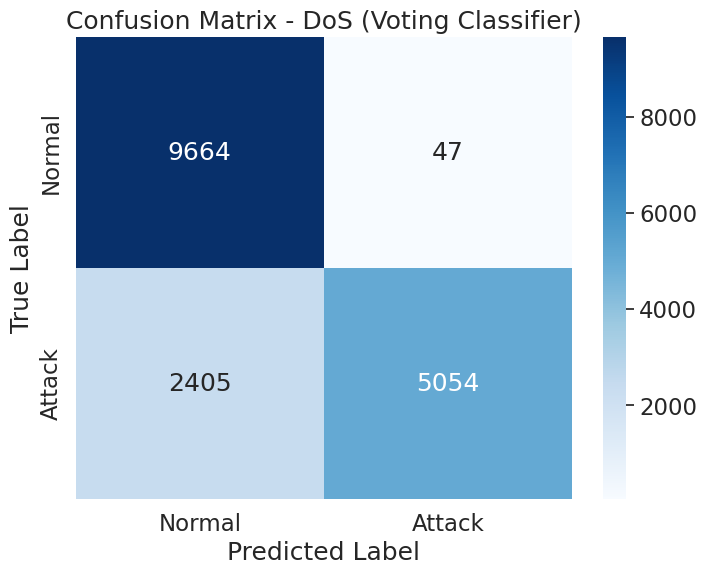

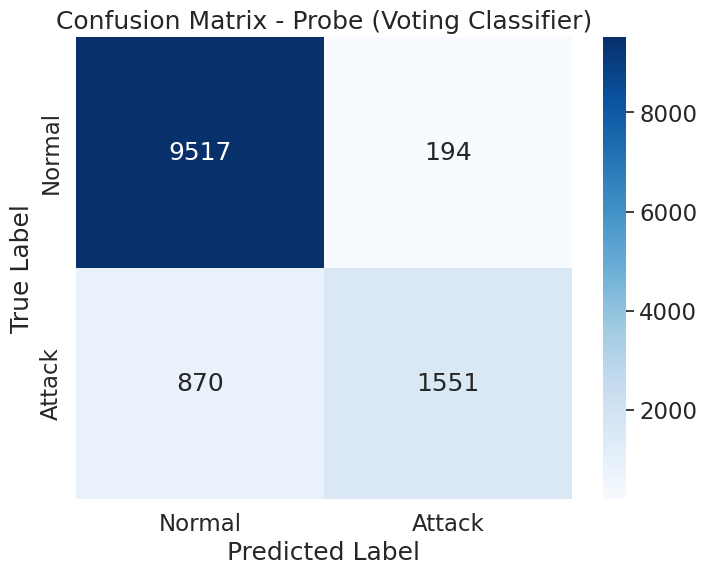

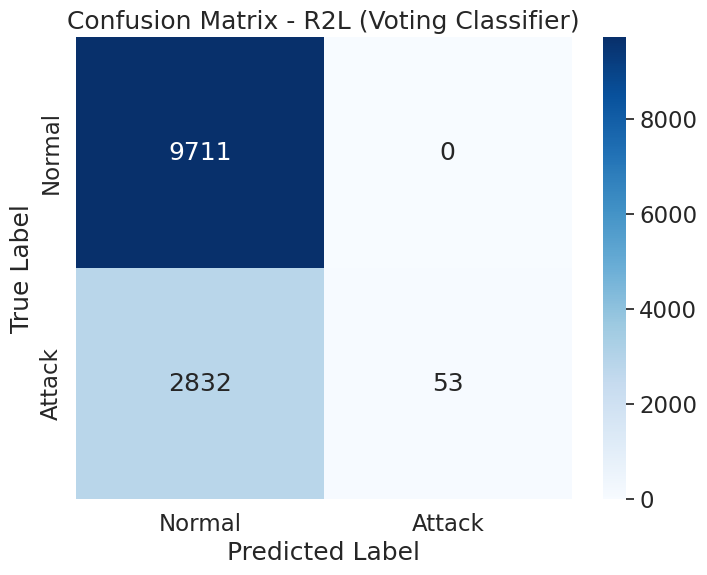

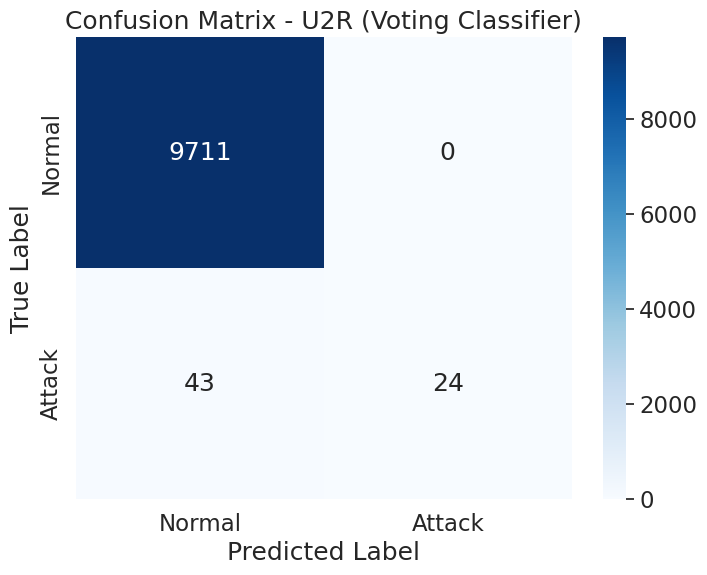

In [ ]:
#Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#Plot confusion matrix heatmaps for each attack type
plot_confusion_matrix_heatmap(Y_test_DoS.astype(int), y_pred_voting_DoS, "Confusion Matrix - DoS (Voting Classifier)")
plot_confusion_matrix_heatmap(Y_test_Probe.astype(int), y_pred_voting_Probe, "Confusion Matrix - Probe (Voting Classifier)")
plot_confusion_matrix_heatmap(Y_test_R2L.astype(int), y_pred_voting_R2L, "Confusion Matrix - R2L (Voting Classifier)")
plot_confusion_matrix_heatmap(Y_test_U2R.astype(int), y_pred_voting_U2R, "Confusion Matrix - U2R (Voting Classifier)")


In [ ]:
#create a Voting Classifier
voting_clf_DoS = VotingClassifier(estimators=[
    ('dt', clf_DoS),
    ('knn', clf1_DoS)
], voting='hard')

voting_clf_Probe = VotingClassifier(estimators=[
    ('dt', clf_Probe),
    ('knn', clf1_Probe)
], voting='hard')

voting_clf_R2L = VotingClassifier(estimators=[
    ('dt', clf_R2L),
    ('knn', clf1_R2L)
], voting='hard')

voting_clf_U2R = VotingClassifier(estimators=[
    ('dt', clf_U2R),
    ('knn', clf1_U2R)
], voting='hard')

#fit the Voting Classifiers
voting_clf_DoS.fit(X_train_DoS, Y_train_DoS.astype(int))
voting_clf_Probe.fit(X_train_Probe, Y_train_Probe.astype(int))
voting_clf_R2L.fit(X_train_R2L, Y_train_R2L.astype(int))
voting_clf_U2R.fit(X_train_U2R, Y_train_U2R.astype(int))

#make predictions
y_pred_voting_DoS = voting_clf_DoS.predict(X_test_DoS)
y_pred_voting_Probe = voting_clf_Probe.predict(X_test_Probe)
y_pred_voting_R2L = voting_clf_R2L.predict(X_test_R2L)
y_pred_voting_U2R = voting_clf_U2R.predict(X_test_U2R)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model_performance(model, X_test, y_test, attack_type):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test.astype(int), y_pred)
    report = classification_report(y_test.astype(int), y_pred)

    print(f"Attack Type: {attack_type}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("\n")

#evaluate Voting Classifiers
evaluate_model_performance(voting_clf_DoS, X_test_DoS, Y_test_DoS, "DoS - Voting")
evaluate_model_performance(voting_clf_Probe, X_test_Probe, Y_test_Probe, "Probe - Voting")
evaluate_model_performance(voting_clf_R2L, X_test_R2L, Y_test_R2L, "R2L - Voting")
evaluate_model_performance(voting_clf_U2R, X_test_U2R, Y_test_U2R, "U2R - Voting")


Attack Type: DoS - Voting
Accuracy: 0.8960
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      9711
           1       0.99      0.77      0.86      7459

    accuracy                           0.90     17170
   macro avg       0.92      0.88      0.89     17170
weighted avg       0.91      0.90      0.89     17170





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

Attack Type: Probe - Voting
Accuracy: 0.7904
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9711
           1       0.00      0.00      0.00      2421
           3       0.00      0.00      0.00         0

    accuracy                           0.79     12132
   macro avg       0.29      0.33      0.31     12132
weighted avg       0.70      0.79      0.74     12132





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

Attack Type: R2L - Voting
Accuracy: 0.7710
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           1       0.00      0.00      0.00      2885
           2       0.00      0.00      0.00         0

    accuracy                           0.77     12596
   macro avg       0.26      0.33      0.29     12596
weighted avg       0.60      0.77      0.67     12596



Attack Type: U2R - Voting
Accuracy: 0.9931
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       0.00      0.00      0.00        67
           4       0.00      0.00      0.00         0

    accuracy                           0.99      9778
   macro avg       0.33      0.33      0.33      9778
weighted avg       0.99      0.99      0.99      9778





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

#Evaluation

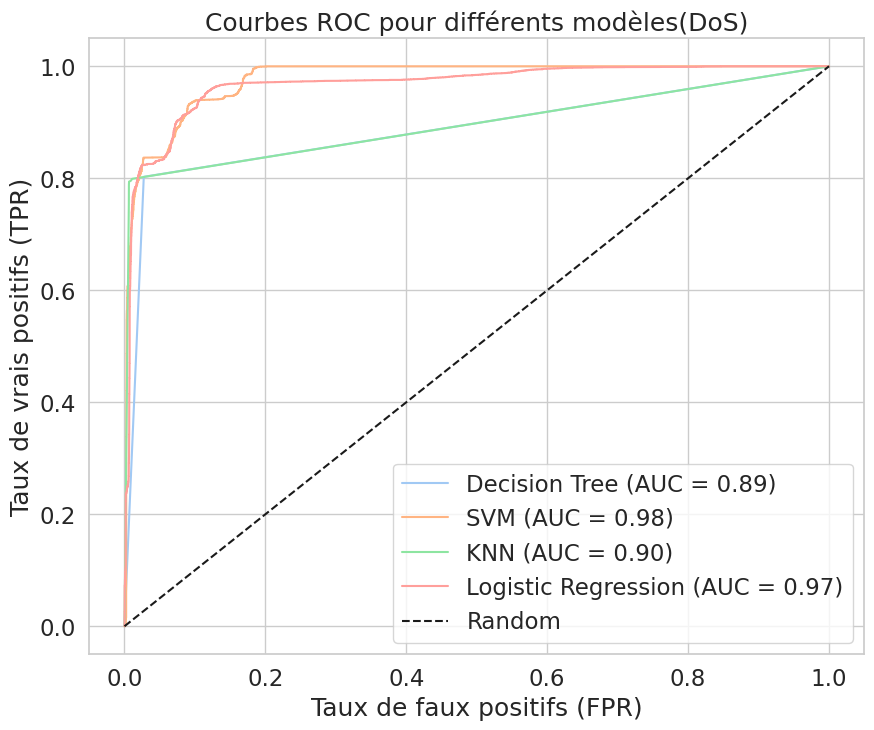

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#define the models
models = {'Decision Tree': clf_DoS,
          'SVM': svm_model_DoS,
          'KNN': clf1_DoS,
          'Logistic Regression': logreg_model_DoS}

#trace ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == 'SVM':
        #SVM model needs the probability instead of predictions
        y_scores = model.decision_function(X_test_DoS)
    else:
        y_scores = model.predict_proba(X_test_DoS)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test_DoS, y_scores)
    auc = roc_auc_score(Y_test_DoS, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour différents modèles(DoS)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#apply DoS conversion
Y_test_DoS = Y_test_DoS.map(lambda x: 0 if x == 0 else 1)
#apply U2R conversion
Y_test_U2R = Y_test_U2R.map(lambda x: 0 if x == 0 else 1)
#apply R2L conversion
Y_test_R2L = Y_test_R2L.map(lambda x: 0 if x == 0 else 1)
#apply Probe conversion
Y_test_Probe = Y_test_Probe.map(lambda x: 0 if x == 0 else 1)


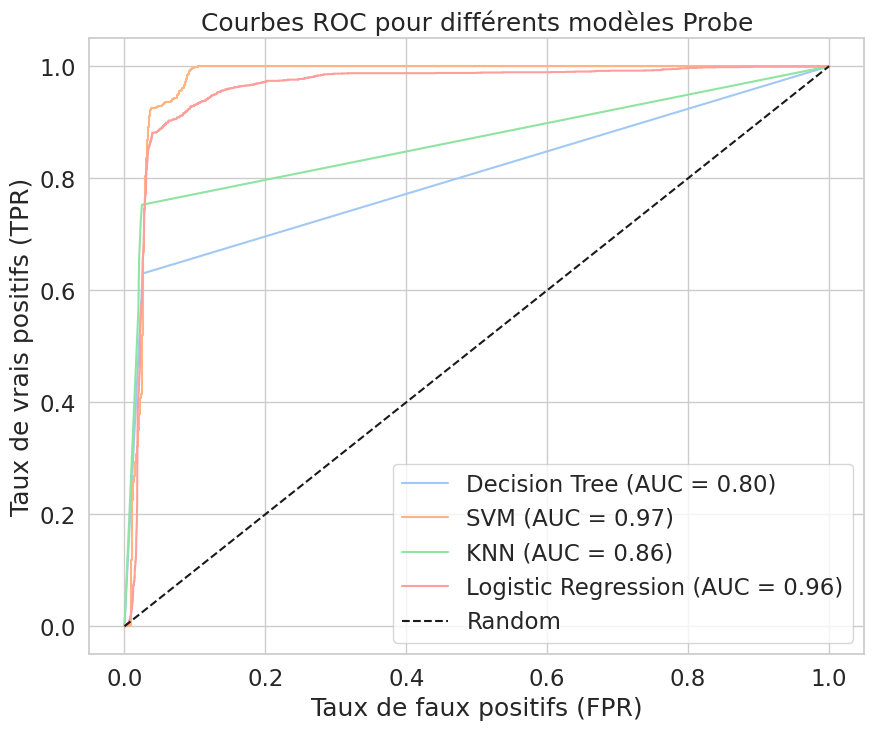

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#define the models
models = {'Decision Tree': clf_Probe,
          'SVM': svm_model_Probe,
          'KNN': clf1_Probe,
          'Logistic Regression': logreg_model_Probe}

#trace ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == 'SVM':
        #SVM model needs the probability instead of predictions
        y_scores = model.decision_function(X_test_Probe)
    else:
        y_scores = model.predict_proba(X_test_Probe)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test_Probe, y_scores)
    auc = roc_auc_score(Y_test_Probe, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour différents modèles Probe')
plt.legend(loc='lower right')
plt.show()


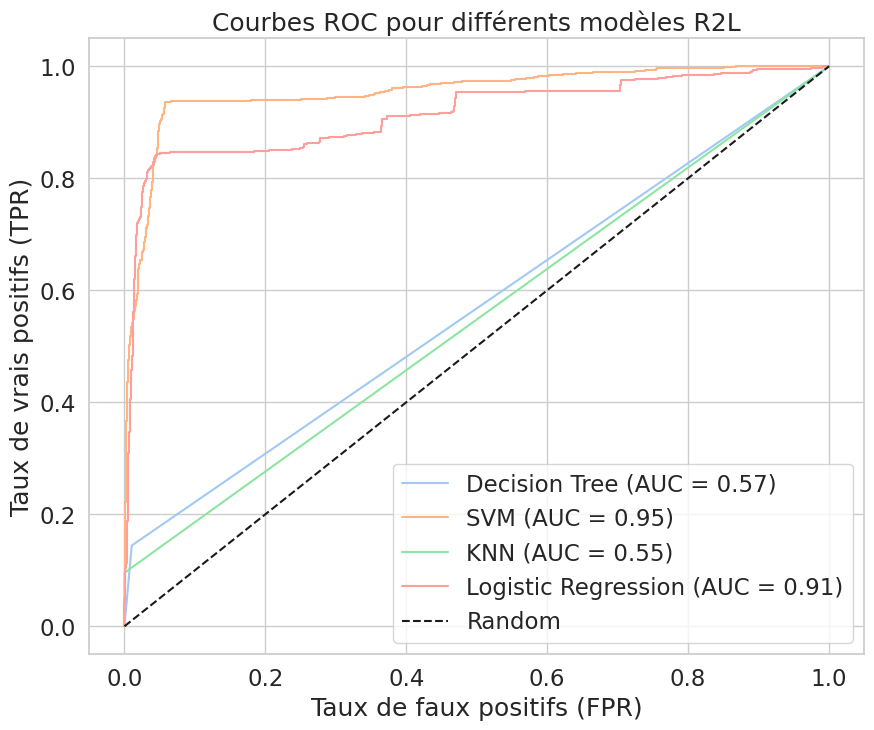

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#define the models
models = {'Decision Tree': clf_R2L,
          'SVM': svm_model_R2L,
          'KNN': clf1_R2L,
          'Logistic Regression': logreg_model_R2L}

#trace ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == 'SVM':
        #SVM model needs the probability instead of predictions
        y_scores = model.decision_function(X_test_R2L)
    else:
        y_scores = model.predict_proba(X_test_R2L)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test_R2L, y_scores)
    auc = roc_auc_score(Y_test_R2L, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour différents modèles R2L')
plt.legend(loc='lower right')
plt.show()


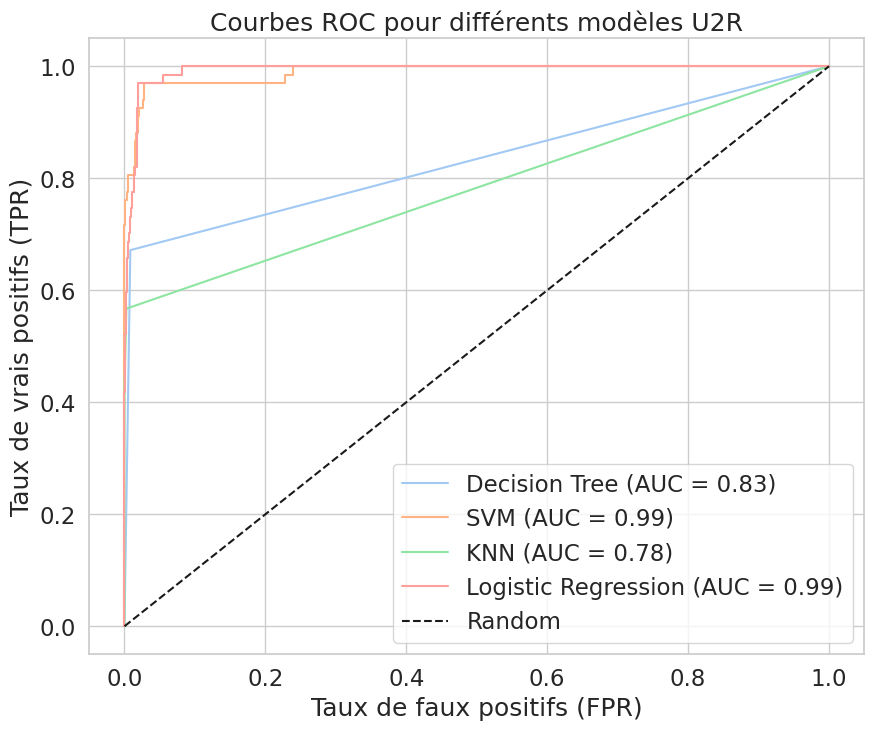

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#define the models
models = {'Decision Tree': clf_U2R,
          'SVM': svm_model_U2R,
          'KNN': clf1_U2R,
          'Logistic Regression': logreg_model_U2R}

#trace ROC curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if name == 'SVM':
        #SVM model needs the probability instead of predictions
        y_scores = model.decision_function(X_test_U2R)
    else:
        y_scores = model.predict_proba(X_test_U2R)[:, 1]

    fpr, tpr, _ = roc_curve(Y_test_U2R, y_scores)
    auc = roc_auc_score(Y_test_U2R, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour différents modèles U2R')
plt.legend(loc='lower right')
plt.show()


#DEPLOYEMENT

In [ ]:
import pickle
pickle.dump(clf1_anvDoS,open('KnnAnvDos.pkl','wb'))
pickle.dump(clf1_anvProbe,open('KnnAnvProbe.pkl','wb'))
pickle.dump(clf1_anvR2L,open('KnnAnvR2L.pkl','wb'))
pickle.dump(clf1_U2R,open('KnnAnvU2R.pkl','wb'))